# 1. Project Charter - Entendimiento del Negocio

## 1. Nombre del Proyecto

**Clasificación de impago de tarjeta de credito de clientes de un banco**

---

## 2. Objetivo del Proyecto

Desarrollar y evaluar un modelo de clasificación que prediga la probabilidad de impago de los clientes de tarjetas de crédito de un banco, utilizando el dataset público “Default of Credit Card Clients” (UCI / Kaggle). El resultado apoyará la toma de decisiones de riesgo al identificar oportunamente clientes con alta probabilidad de incumplimiento. Lo anterior usando herramientas y conceptos propios de las metodologías agiles aplicadas a la ciencia de datos.

- **Fuente de datos**: [Default of Credit Card Clients (Kaggle)](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

---


## 3. Alcance del Proyecto


- **Datos:** dataset **Default of Credit Card Clients Dataset**de 30 000 registros y 23 variables.
  - **ID**: Identificador de cada cliente.
  - **LIMIT_BAL**: Monto de crédito otorgado en dólares NTD (dólar taiwanés), incluye crédito individual y familiar/suplementario.
  - **SEX**: Género (1 = masculino, 2 = femenino).
  - **EDUCATION**: Nivel educativo (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido).
  - **MARRIAGE**: Estado civil (1 = casado, 2 = soltero, 3 = otros).
  - **AGE**: Edad en años.
  - **PAY_0**: Estado de pago en septiembre de 2005 (–1 = pago puntual, 1 = retraso de un mes, 2 = retraso de dos meses, …, 8 = retraso de ocho meses, 9 = retraso de nueve meses o más).
  - **PAY_2**: Estado de pago en agosto de 2005 (misma escala).
  - **PAY_3**: Estado de pago en julio de 2005 (misma escala).
  - **PAY_4**: Estado de pago en junio de 2005 (misma escala).
  - **PAY_5**: Estado de pago en mayo de 2005 (misma escala).
  - **PAY_6**: Estado de pago en abril de 2005 (misma escala).
  - **BILL_AMT1**: Monto de la factura en septiembre de 2005 (dólares NTD).
  - **BILL_AMT2**: Monto de la factura en agosto de 2005 (dólares NTD).
  - **BILL_AMT3**: Monto de la factura en julio de 2005 (dólares NTD).
  - **BILL_AMT4**: Monto de la factura en junio de 2005 (dólares NTD).
  - **BILL_AMT5**: Monto de la factura en mayo de 2005 (dólares NTD).
  - **BILL_AMT6**: Monto de la factura en abril de 2005 (dólares NTD).
  - **PAY_AMT1**: Monto del pago anterior en septiembre de 2005 (dólares NTD).
  - **PAY_AMT2**: Monto del pago anterior en agosto de 2005 (dólares NTD).
  - **PAY_AMT3**: Monto del pago anterior en julio de 2005 (dólares NTD).
  - **PAY_AMT4**: Monto del pago anterior en junio de 2005 (dólares NTD).
  - **PAY_AMT5**: Monto del pago anterior en mayo de 2005 (dólares NTD).
  - **PAY_AMT6**: Monto del pago anterior en abril de 2005 (dólares NTD).
  - **default.payment.next.month**: Indicador de impago el mes siguiente (1 = sí, 0 = no).


- **Fases TDSP** alineadas con la rúbrica del curso:
  1. Entendimiento del negocio y carga de datos.
  2. Preprocesamiento y Análisis exploratorio de datos (EDA).
  3. Modelamiento y Extracción de características.
  4. Despliegue (prototipo local/API) y gestión de versiones.
  5. Evaluación final y presentación.
- **Herramientas** a usar:
  - **Git** → versionamiento de código.
  - **DVC** → versionamiento de datos.
  - **MLflow** → seguimiento de experimentos y modelos.
  - Python, pandas, scikit‑learn, Jupyter, FastAPI (opcional para demo).
- **Entregables** por fase:

| Fase | Entregables obligatorios (según rúbrica) |
|------|-------------------------------------------|
| 1 | Marco de proyecto, código de carga de datos, diccionario de datos |
| 2 | Código de preprocesamiento/EDA, resumen estadístico, visualizaciones |
| 3 | Código de extracción de características, notebooks de modelamiento, reporte de línea base y modelo final (MLflow) |
| 4 | Código de despliegue (prototipo), documentación de despliegue y entorno |
| 5 | Código de evaluación, interpretación de resultados, video de presentación |
| 6 | **Entrega final** |

- **Criterios de éxito (baseline):** AUC‑ROC ≥ 0.78, Recall ≥ 0.60 en el dataset de prueba.

---

## 3.1. Excluye:

- Integrar datos adicionales (p. ej. perfiles transaccionales).
- Despliegue productivo en la nube.
- Análisis financiero detallado más allá de métricas de clasificación.

---

## 3.2 Carga de los datos




---

In [2]:
import pandas as pd

In [7]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "UCI_Credit_Card.csv"  # nombre exacto

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/default-of-credit-card-clients-dataset",
  file_path
)

print("First 5 records:", df.head())


/tmp/ipython-input-7-1678825860.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0      

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Se ha cargado el CSV con éxito y se ha comprobado que todas las columnas están presentes**


## 4. Metodología

Se adoptará el marco **TDSP** (Team Data Science Process) complementado con prácticas Ágiles y las herramientas del curso:

- **Plan** → Backlog en GitHub Projects, sprints semanales.
- **Develop** → Git + DVC para rastrear notebooks, código y datasets.
- **Build** → MLflow para experimentos, métricas y artefactos de modelos.
- **Deploy** → Prototipo local o API FastAPI..
- **Operate** → Métricas de evaluación y reflexiones sobre el modelo resultante. Reflexionando sobre cómo podría cambiar la relación entre variables y el resultado (impago) en el tiempo, y cómo esto afectaría la vigencia del modelo entrenado.

A continuación se muestra el ciclo de vida del proceso TDSP utilizado en el proyecto:

> ![Ciclo de vida TDSP](./Imagenes/metodologia.png)



---



## 5. Cronograma

| Fase TDSP | Entregables clave | Fechas |
|-----------|------------------|--------|
| 1 – Entendimiento & Carga | • Marco del proyecto  <br>• Notebook de carga de datos  <br>• Diccionario de datos | 26 jun → 03 jul |
| 2 – Preprocesamiento & EDA | • Código de limpieza y EDA  <br>• Resumen estadístico y visualizaciones clave | 04 → 11 jul |
| 3 – Modelamiento & Features | • Pipeline de ingeniería de características  <br>• Modelos baseline y mejorados rastreados en MLflow  <br>• Reporte comparativo | 12 → 18 jul |
| 4 – Despliegue (Prototipo) | • Script/API  <br>• Documentación de infraestructura local  <br>• Configuración de DVC | 29 → 25 jul |
| 5 – Evaluación & Entrega final | • Notebook de evaluación en *hold‑out/particiones entrenamiento prueba*  <br>• Interpretación de resultados y limitaciones  <br>• Video (≤ 5 min) con presentación del proyecto | 28 jul |



---

## 6. Equipo del Proyecto

| Nombre | Rol | Responsabilidades |
|--------|-----|------------------|
| Juan Felipe Caro Monroy | Líder del equipo| Dirección general, código, experimentos, presentación |
| Miguel Ángel Naranjo | Líder del proyecto | Guía técnica,  código, experimentos, presentación |
| Edwin David García| Científico de datos| Guía técnica, código, experimentos, presentación |



---

## 7. Presupuesto

Sin presupuesto monetario, se utilizan recursos gratuitos (Kaggle, GitHub, DVC remotos locales, MLflow local).

---

## 8. Stakeholders

- **Profesor(a) del módulo** – Supervisor académico y evaluador.
- **Tutor/monitor del módulo** – Feedback  durante revisiones y evaluador.
- **Cliente hipotetico de Riesgo Bancario**

---



## 9. Aprobaciones




| Nombre | Cargo | Firma | Fecha |
|--------|-------|-------|-------|
| Jorge Eliécer Camargo Mendoza | Docente | ____________________ | ___ / ___ / 2025 |
| Juan Sebastian Malagón Torres | Tutor/Monitor | ____________________ | ___ / ___ / 2025 |

# 2. Data

# 2.1 Definición de los datos

## 2.1.1 Origen de los datos

- **Fuente**: [Kaggle – Default of Credit Card Clients Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)
- **Fecha de descarga**: 03‑jul‑2025  
- **Versión**: 1 (tag `versions/1` en Kaggle)  
- **Licencia**: Creative Commons Attribution 4.0 (CC BY‑4.0)  
- **Método de obtención**: Descargando el CSV de la plataforma e importandolo desd el notebook.

## 2.1.2 Especificación de los scripts para la carga de datos

| Script / Notebook              | Descripción                                                     | Entrada                        | Salida                            |
| ------------------------------ | --------------------------------------------------------------- | ------------------------------ | --------------------------------- |
| `notebooks/01_load_data.ipynb` | Carga inicial, validación de columnas y conversión a Parquet    | `data/UCI_Credit_Card.csv` | `data/credit_raw_procesado.parquet` |
| `src/data/procesamiento.py`   | Script reproducible (DVC) para descarga y ejecución | URL Kaggle API                 | `data/UCI_Credit_Card.csv`    |



---

## 2.1.3 Referencias a rutas o bases de datos origen y destino

### Rutas de origen de datos

- **Ubicación**: `data/UCI_Credit_Card.csv`
- **Estructura**: CSV con 30 000 filas × 24 columnas, separador `,`, codificación `UTF-8`.
- **Procedimientos de transformación y limpieza**:
  1. Cargar el archivo CSV y verificar dimensiones y tipos de datos.
  2. Validar nombres de columnas y corregir inconsistencias.
  3. Identificar valores faltantes y revisar su impacto.
  4. Realizar limpieza básica según sea necesario (por definir).
  5. Guardar el dataset listo para análisis en formato Parquet.

### Base de datos de destino

- **Destino**: archivo Parquet limpio en `data/credit_raw_procesado.parquet`
- **Estructura**: tabla `credit_clean` con 23 columnas (`int64`, `float64`, `category`(posible)).
- **Procedimiento de carga y transformación**:

#### Pasos para crear la etapa `preprocess` en DVC:

1. Iniciar el repositorio de DVC con `dvc init` .
2. Disponer `data/UCI_Credit_Card.csv` en el directorio indicado.
3. Crear un script de preprocesamiento en `src/data/preprocess.py` que limpie y transforme los datos.
4. Registrar esta etapa en DVC:
   - Archivo de entrada (`-d`): `src/data/procesamiento.py`
   - Archivo de salida (`-o`): `data/credit_card_procesado.parquet`
   - Script a ejecutar: `python src/data/preprocess.pyy`
5. Confirmar que se ha generado un archivo `.dvc` que representa la etapa.
6. Añadir este archivo al control de versiones con `git add` y hacer *commit*.

> Esto deja trazabilidad en DVC y permite reproducir el preprocesamiento en cualquier entorno.



# 2.2 DICCIONARIO DE DATOS

In [ ]:
import kagglehub
import pandas as pd
import pyarrow as pyw

# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)

# Cargue de la data en un dataframe
df = pd.read_csv(path + "/UCI_Credit_Card.csv",dtype_backend="pyarrow")

Path to dataset files: /kaggle/input/default-of-credit-card-clients-dataset


In [ ]:
df.dtypes

,0
ID,int64[pyarrow]
LIMIT_BAL,double[pyarrow]
SEX,int64[pyarrow]
EDUCATION,int64[pyarrow]
MARRIAGE,int64[pyarrow]
AGE,int64[pyarrow]
PAY_0,int64[pyarrow]
PAY_2,int64[pyarrow]
PAY_3,int64[pyarrow]
PAY_4,int64[pyarrow]


In [ ]:
# Se carga la informacion general de la data credito
df.info()
df_tipo= df.dtypes.reset_index().rename(columns={0:'Tipo_variable'})
df_max= df.max(axis=0).reset_index().rename(columns={0:'max'})
df_min= df.min(axis=0).reset_index().rename(columns={0:'min'})
df_descrip= pd.DataFrame(data=[{
'ID': 'Identificador de cada cliente',
'LIMIT_BAL': 'Monto de crédito otorgado en dólares NTD (dólar taiwanés), incluye crédito individual y familiar/suplementario',
'SEX': 'Género (1 = masculino, 2 = femenino)',
'EDUCATION': 'Nivel educativo (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido)',
'MARRIAGE': 'Estado civil (1 = casado, 2 = soltero, 3 = otros)',
'AGE': 'Edad en años',
'PAY_0': 'Estado de pago en septiembre de 2005 (–1 = pago puntual, 1 = retraso de un mes, 2 = retraso de dos meses, …, 8 = retraso de ocho meses, 9 = retraso de nueve meses o más)',
'PAY_2': 'Estado de pago en agosto de 2005 (misma escala)',
'PAY_3': 'Estado de pago en julio de 2005 (misma escala)',
'PAY_4': 'Estado de pago en junio de 2005 (misma escala)',
'PAY_5': 'Estado de pago en mayo de 2005 (misma escala)',
'PAY_6': 'Estado de pago en abril de 2005 (misma escala)',
'BILL_AMT1': 'Monto de la factura en septiembre de 2005 (dólares NTD)',
'BILL_AMT2': 'Monto de la factura en agosto de 2005 (dólares NTD)',
'BILL_AMT3': 'Monto de la factura en julio de 2005 (dólares NTD)',
'BILL_AMT4': 'Monto de la factura en junio de 2005 (dólares NTD)',
'BILL_AMT5': 'Monto de la factura en mayo de 2005 (dólares NTD)',
'BILL_AMT6': 'Monto de la factura en abril de 2005 (dólares NTD)',
'PAY_AMT1': 'Monto del pago anterior en septiembre de 2005 (dólares NTD)',
'PAY_AMT2': 'Monto del pago anterior en agosto de 2005 (dólares NTD)',
'PAY_AMT3': 'Monto del pago anterior en julio de 2005 (dólares NTD)',
'PAY_AMT4': 'Monto del pago anterior en junio de 2005 (dólares NTD)',
'PAY_AMT5': 'Monto del pago anterior en mayo de 2005 (dólares NTD)',
'PAY_AMT6': 'Monto del pago anterior en abril de 2005 (dólares NTD)',
'default.payment.next.month': 'Indicador de impago el mes siguiente (1 = sí, 0 = no)'}]).T.reset_index().rename(columns={0:'Descripcion'})
# Se verifica  la calidad de conjunto de datos verificando datos nulos o faltantes de acuerdo al tipo de dato
# Se verifica para todo el conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   ID                          30000 non-null  int64[pyarrow] 
 1   LIMIT_BAL                   30000 non-null  double[pyarrow]
 2   SEX                         30000 non-null  int64[pyarrow] 
 3   EDUCATION                   30000 non-null  int64[pyarrow] 
 4   MARRIAGE                    30000 non-null  int64[pyarrow] 
 5   AGE                         30000 non-null  int64[pyarrow] 
 6   PAY_0                       30000 non-null  int64[pyarrow] 
 7   PAY_2                       30000 non-null  int64[pyarrow] 
 8   PAY_3                       30000 non-null  int64[pyarrow] 
 9   PAY_4                       30000 non-null  int64[pyarrow] 
 10  PAY_5                       30000 non-null  int64[pyarrow] 
 11  PAY_6                       30000 non-nul

In [ ]:
df_summary = pd.merge(df_tipo,df_max,on='index')
df_summary = pd.merge(df_summary,df_min,on='index')
df_summary = pd.merge(df_summary,df_descrip,left_on='index',right_on='index')
df_summary.head(10)
# Reordenar el dataframe e integrar fuente de datos
df_summary = df_summary.rename(columns={'index': 'Variable'})
df_summary['Fuente'] = 'Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.'
df_summary = df_summary[['Variable','Descripcion','Tipo_variable','max','min','Fuente']]
df_summary.head(10)


,Variable,Descripcion,Tipo_variable,max,min,Fuente
0,ID,Identificador de cada cliente,int64[pyarrow],30000.0,1.0,"Lichman, M. (2013). UCI Machine Learning Repos..."
1,LIMIT_BAL,Monto de crédito otorgado en dólares NTD (dóla...,double[pyarrow],1000000.0,10000.0,"Lichman, M. (2013). UCI Machine Learning Repos..."
2,SEX,"Género (1 = masculino, 2 = femenino)",int64[pyarrow],2.0,1.0,"Lichman, M. (2013). UCI Machine Learning Repos..."
3,EDUCATION,"Nivel educativo (1 = posgrado, 2 = universidad...",int64[pyarrow],6.0,0.0,"Lichman, M. (2013). UCI Machine Learning Repos..."
4,MARRIAGE,"Estado civil (1 = casado, 2 = soltero, 3 = otros)",int64[pyarrow],3.0,0.0,"Lichman, M. (2013). UCI Machine Learning Repos..."
5,AGE,Edad en años,int64[pyarrow],79.0,21.0,"Lichman, M. (2013). UCI Machine Learning Repos..."
6,PAY_0,Estado de pago en septiembre de 2005 (–1 = pag...,int64[pyarrow],8.0,-2.0,"Lichman, M. (2013). UCI Machine Learning Repos..."
7,PAY_2,Estado de pago en agosto de 2005 (misma escala),int64[pyarrow],8.0,-2.0,"Lichman, M. (2013). UCI Machine Learning Repos..."
8,PAY_3,Estado de pago en julio de 2005 (misma escala),int64[pyarrow],8.0,-2.0,"Lichman, M. (2013). UCI Machine Learning Repos..."
9,PAY_4,Estado de pago en junio de 2005 (misma escala),int64[pyarrow],8.0,-2.0,"Lichman, M. (2013). UCI Machine Learning Repos..."


In [ ]:
df_salida = df.isnull().all(axis=1)
count_filas_nulas = df_salida.loc[df_salida == True].count()
print(count_filas_nulas)

0


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Por medio del codigo anterior se determina que no existe valores nulos dentro del conjunto de datos, para ninguno de los campos del mismo.


# 2.3. Reporte de Datos

Este documento contiene los resultados del análisis exploratorio de datos.


## Resumen general de los datos

En esta sección se presenta un resumen general de los datos. Se describe el número total de observaciones, variables, el tipo de variables, la presencia de valores faltantes y la distribución de las variables.

## Resumen de calidad de los datos

En esta sección se presenta un resumen de la calidad de los datos. Se describe la cantidad y porcentaje de valores faltantes, valores extremos, errores y duplicados. También se muestran las acciones tomadas para abordar estos problemas.

In [10]:
# Conteo de valores faltantes
missing_count = df.isnull().sum()
# Porcentaje de valores faltantes
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    "Valores Faltantes": missing_count,
    "% del Total": missing_percent
}).sort_values(by="Valores Faltantes", ascending=False)

print("📌 Valores faltantes:\n")
print(missing_df)

📌 Valores faltantes:

                            Valores Faltantes  % del Total
ID                                          0          0.0
LIMIT_BAL                                   0          0.0
SEX                                         0          0.0
EDUCATION                                   0          0.0
MARRIAGE                                    0          0.0
AGE                                         0          0.0
PAY_0                                       0          0.0
PAY_2                                       0          0.0
PAY_3                                       0          0.0
PAY_4                                       0          0.0
PAY_5                                       0          0.0
PAY_6                                       0          0.0
BILL_AMT1                                   0          0.0
BILL_AMT2                                   0          0.0
BILL_AMT3                                   0          0.0
BILL_AMT4                         

In [11]:
# Número de filas duplicadas
duplicated_rows = df.duplicated().sum()

print(f"\n📌 Filas duplicadas: {duplicated_rows}")



📌 Filas duplicadas: 0


## Variable objetivo

En esta sección se describe la variable objetivo. Se muestra la distribución de la variable y se presentan gráficos que permiten entender mejor su comportamiento.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Renombramos para facilitar análisis (opcional)
target_col = "default.payment.next.month"

# Conteo absoluto y relativo
counts = df[target_col].value_counts()
percent = df[target_col].value_counts(normalize=True) * 100

# Mostrar resumen numérico
summary = pd.DataFrame({"Frecuencia": counts, "Porcentaje": percent.round(2)})
summary.index = ["No Incumplió (0)", "Incumplió (1)"]
print("📊 Distribución de la variable objetivo:\n")
print(summary)


📊 Distribución de la variable objetivo:

                  Frecuencia  Porcentaje
No Incumplió (0)       23364       77.88
Incumplió (1)           6636       22.12


/tmp/ipython-input-14-1027984647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, palette="Set2")


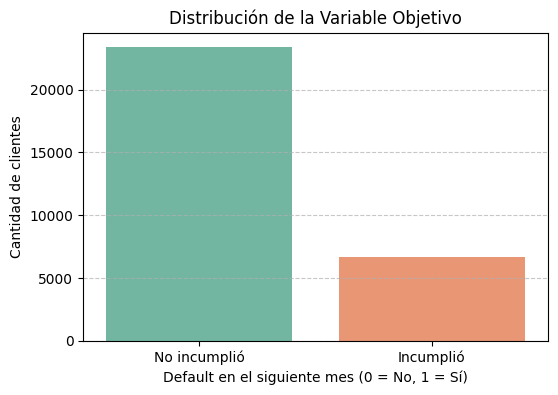

In [14]:
# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target_col, palette="Set2")
plt.title("Distribución de la Variable Objetivo")
plt.xlabel("Default en el siguiente mes (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.xticks([0, 1], ["No incumplió", "Incumplió"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


La variable objetivo 'default.payment.next.month' es binaria y representa si un cliente incumplió con el pago de su crédito en el siguiente mes.

De los 30.000 registros:
- Alrededor del 77% de los clientes no incumplieron con sus pagos.
- Mientras que el 22% sí lo hicieron.

Esta distribución indica un desbalance moderado entre clases, lo cual puede influir en el desempeño de los modelos de clasificación. Este desbalance deberá tenerse en cuenta al momento de entrenar el modelo (por ejemplo, utilizando métricas como F1-score, o aplicando técnicas como sobre/sobremuestreo o ajuste de pesos).

**Soluciones**

a. Muchos algoritmos de clasificación permiten penalizar más los errores cometidos en la clase minoritaria. Esto se logra ajustando los pesos de las clases en la función de pérdida del modelo:

Se le da mayor peso a la clase menos representada.

Ejemplo: en XGBoost, se usa el parámetro scale_pos_weight = n_negativos / n_positivos.

b. Remuestreo de los datos
Esta técnica implica modificar la muestra de entrenamiento para equilibrar la proporción de clases.

c. Oversampling (sobremuestreo)
Consiste en aumentar artificialmente la clase minoritaria. Puede hacerse replicando ejemplos o generando nuevos (por ejemplo, con SMOTE).


## Variables individuales

En esta sección se presenta un análisis detallado de cada variable individual. Se muestran estadísticas descriptivas, gráficos de distribución y de relación con la variable objetivo (si aplica). Además, se describen posibles transformaciones que se pueden aplicar a la variable.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Variable objetivo
target = 'default.payment.next.month'

# Separar por tipo de variable
numericas = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

ordinales = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

categoricas = ['SEX', 'EDUCATION', 'MARRIAGE']

# ----------- Función para analizar variable numérica -----------
def analizar_numerica(df, var):
    print(f"\n📊 Variable numérica: {var}")
    display(df[var].describe())

    # Histograma
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f"Distribución de {var}")
    plt.show()

    # Boxplot
    sns.boxplot(x=df[var])
    plt.title(f"Outliers en {var}")
    plt.show()

    # Relación con la variable objetivo
    sns.boxplot(x=target, y=var, data=df)
    plt.title(f"{var} vs {target}")
    plt.show()

# ----------- Función para analizar variable categórica -----------
def analizar_categorica(df, var):
    print(f"\n🧩 Variable categórica: {var}")
    display(df[var].value_counts(normalize=True).round(3) * 100)

    # Gráfico de barras
    sns.countplot(x=var, data=df)
    plt.title(f"Distribución de {var}")
    plt.show()

    # Relación con la variable objetivo
    sns.barplot(x=var, y=target, data=df, ci=None)
    plt.title(f"Tasa de default por categoría de {var}")
    plt.show()

**Variables númericas**

📈 Análisis de variables individuales

📊 Variable numérica: LIMIT_BAL


,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


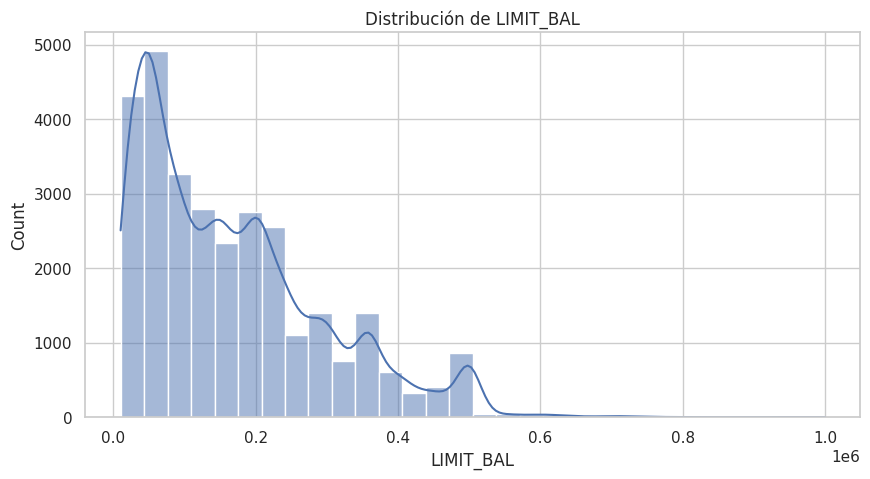

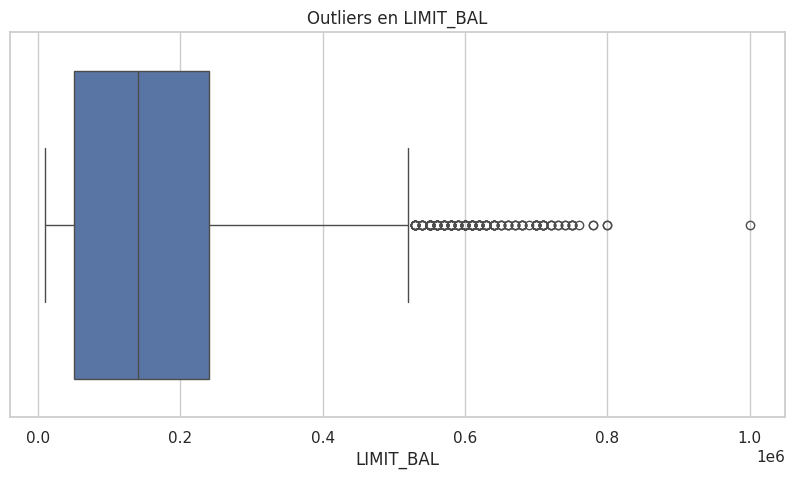

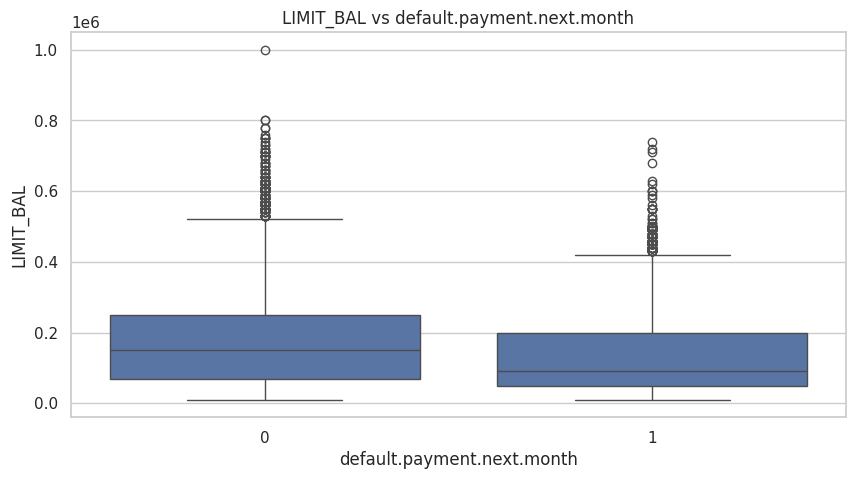


📊 Variable numérica: AGE


,AGE
count,30000.000000
mean,35.485500
std,9.217904
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


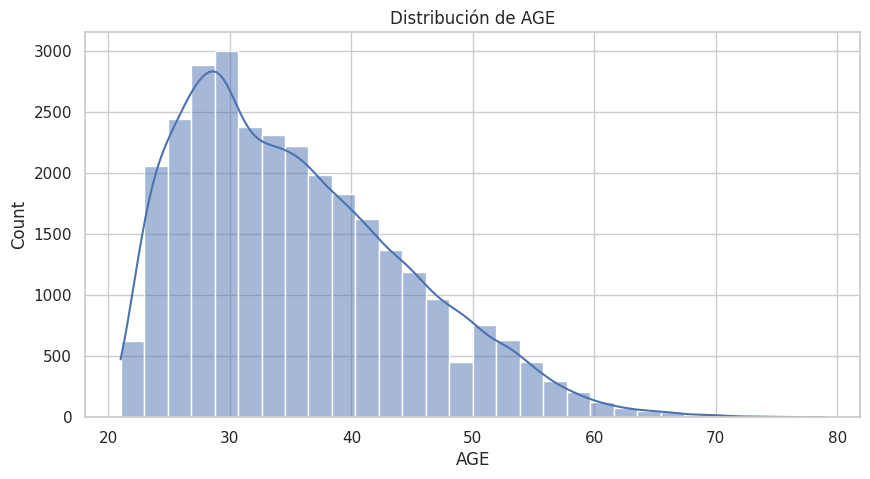

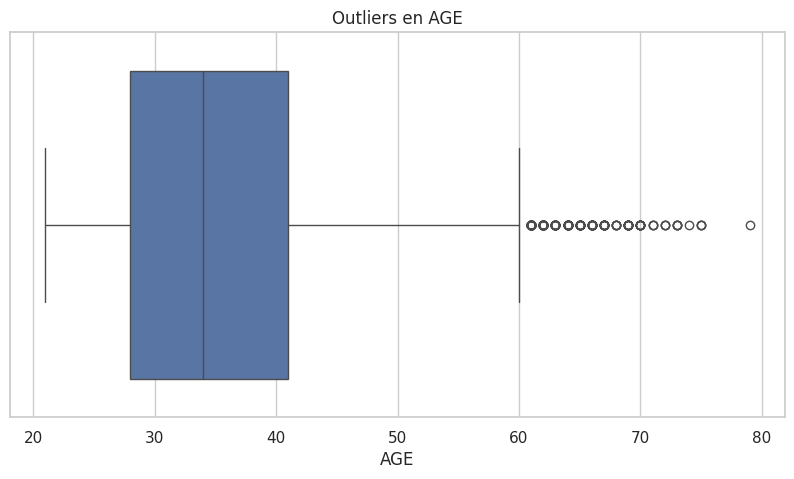

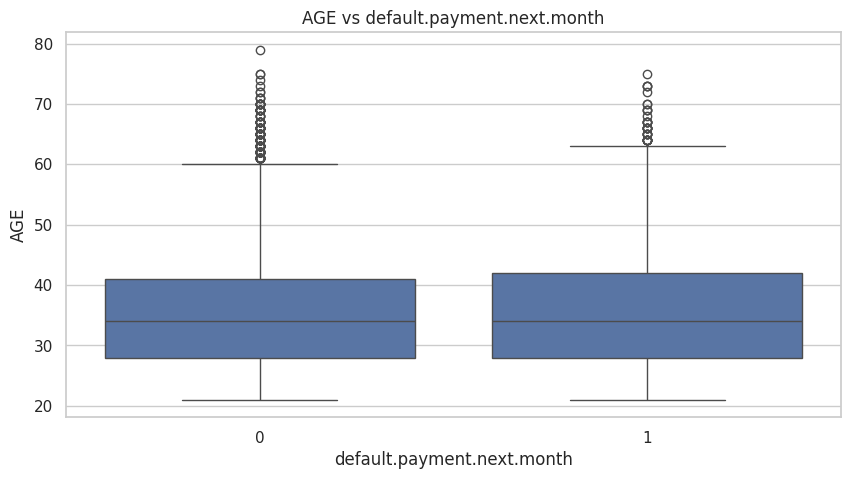


📊 Variable numérica: BILL_AMT1


,BILL_AMT1
count,30000.000000
mean,51223.330900
std,73635.860576
min,-165580.000000
25%,3558.750000
50%,22381.500000
75%,67091.000000
max,964511.000000


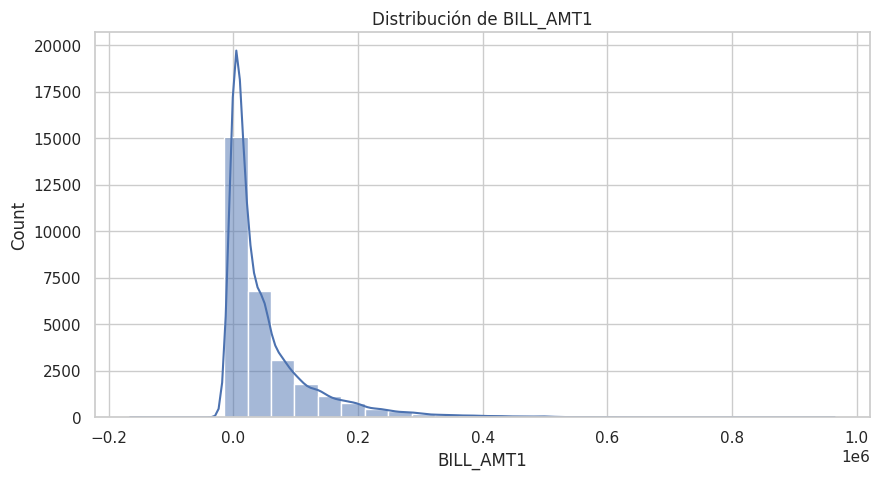

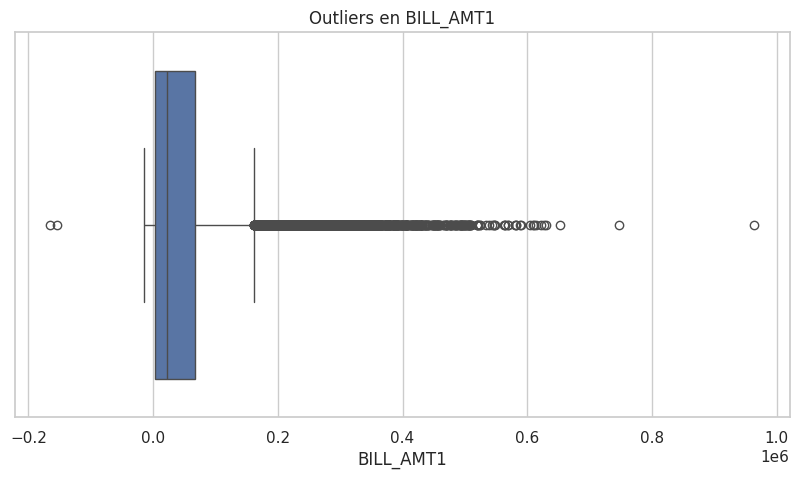

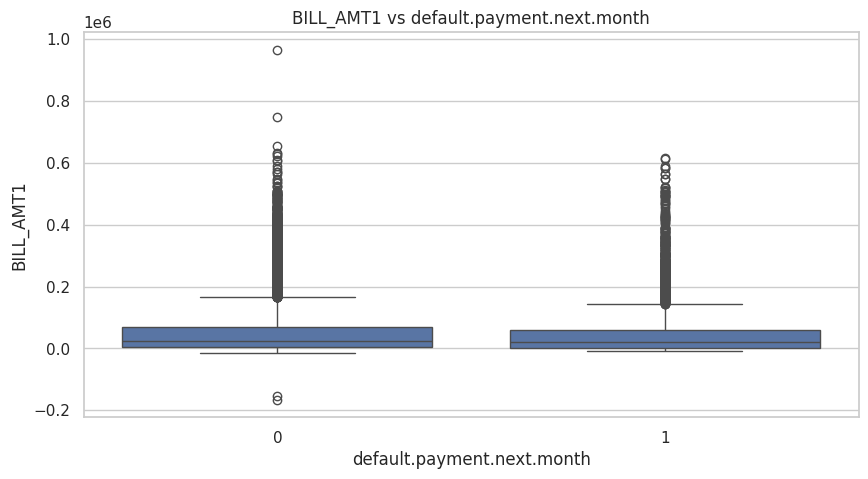


📊 Variable numérica: BILL_AMT2


,BILL_AMT2
count,30000.000000
mean,49179.075167
std,71173.768783
min,-69777.000000
25%,2984.750000
50%,21200.000000
75%,64006.250000
max,983931.000000


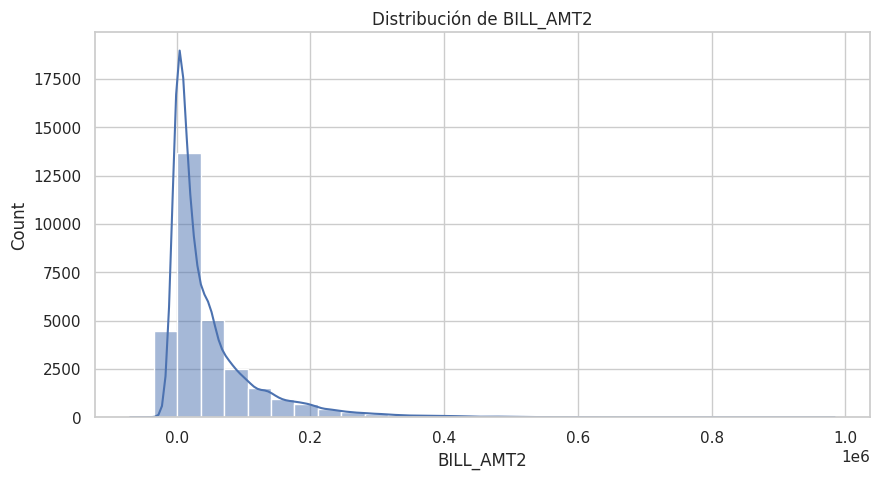

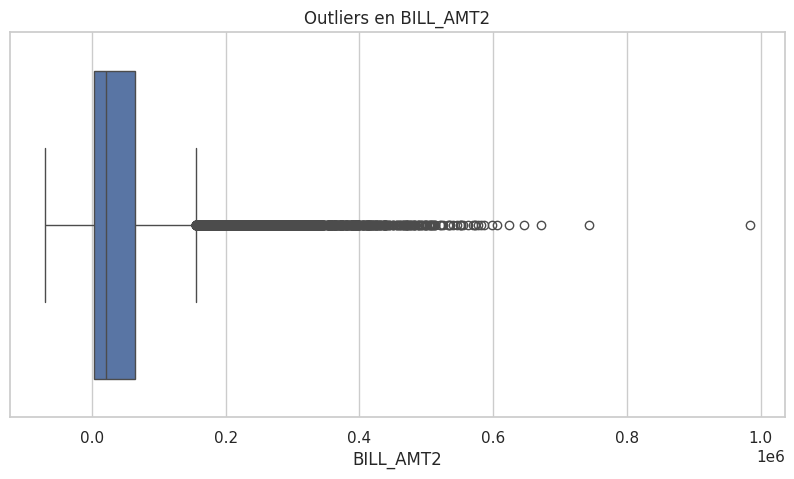

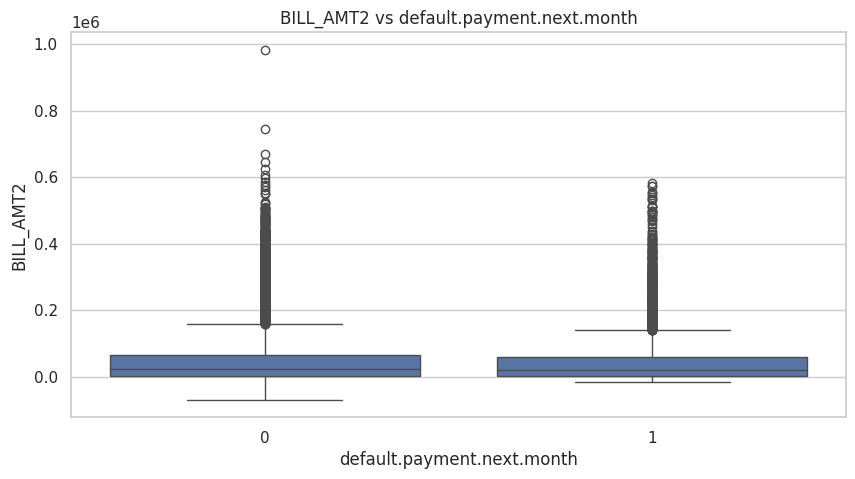


📊 Variable numérica: BILL_AMT3


,BILL_AMT3
count,3.000000e+04
mean,4.701315e+04
std,6.934939e+04
min,-1.572640e+05
25%,2.666250e+03
50%,2.008850e+04
75%,6.016475e+04
max,1.664089e+06


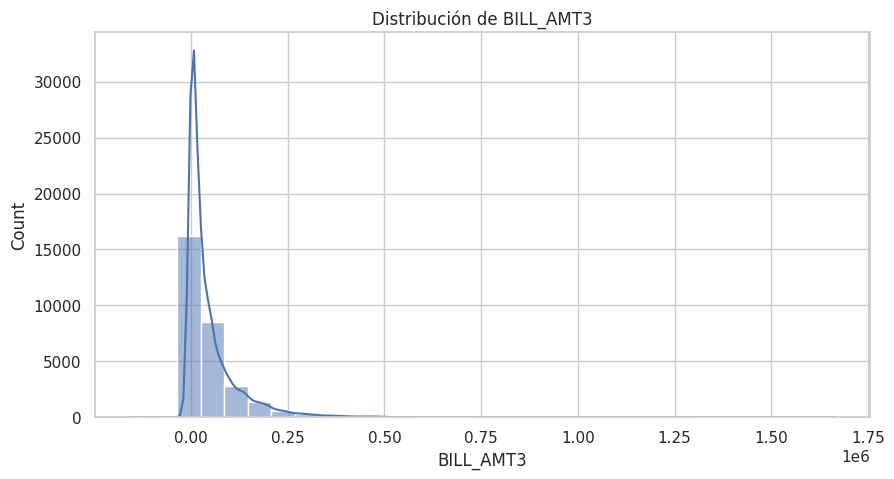

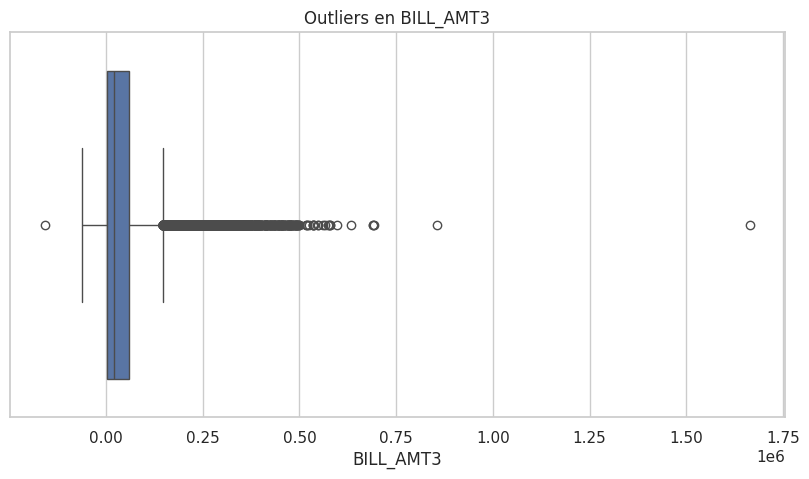

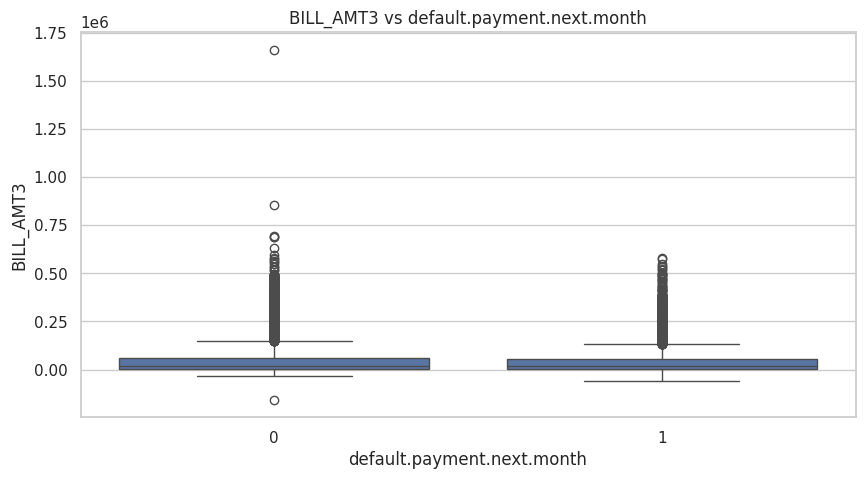


📊 Variable numérica: BILL_AMT4


,BILL_AMT4
count,30000.000000
mean,43262.948967
std,64332.856134
min,-170000.000000
25%,2326.750000
50%,19052.000000
75%,54506.000000
max,891586.000000


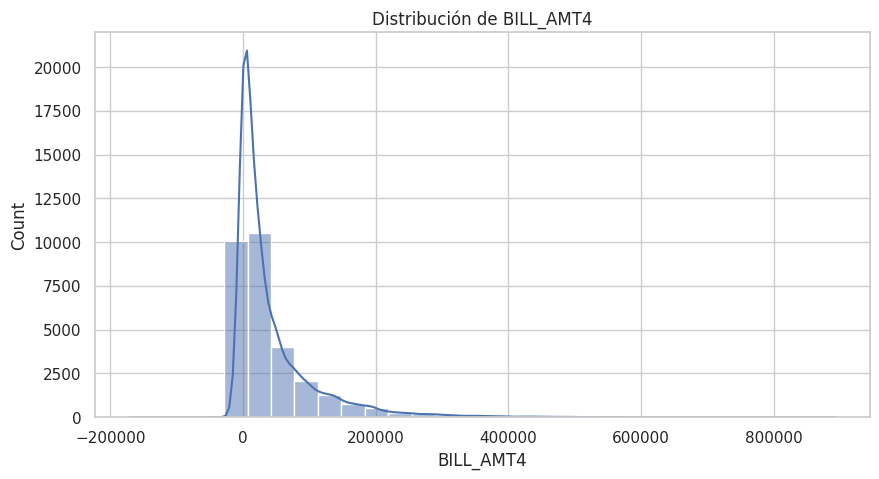

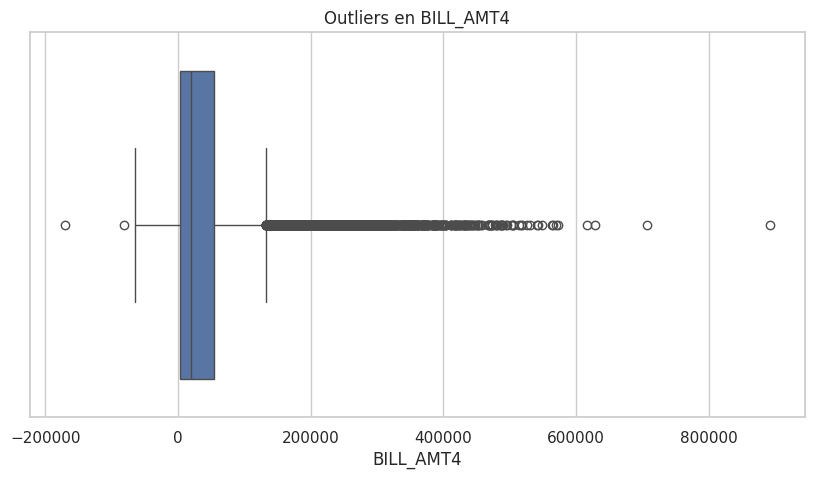

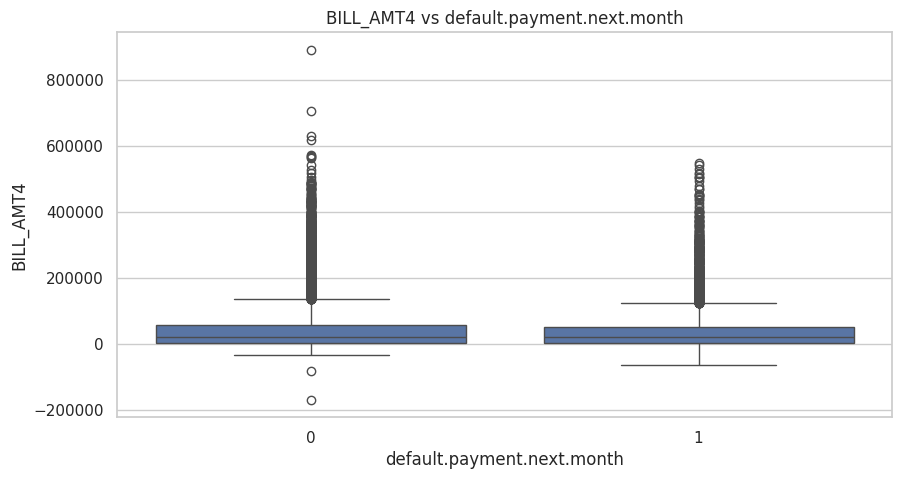


📊 Variable numérica: BILL_AMT5


,BILL_AMT5
count,30000.000000
mean,40311.400967
std,60797.155770
min,-81334.000000
25%,1763.000000
50%,18104.500000
75%,50190.500000
max,927171.000000


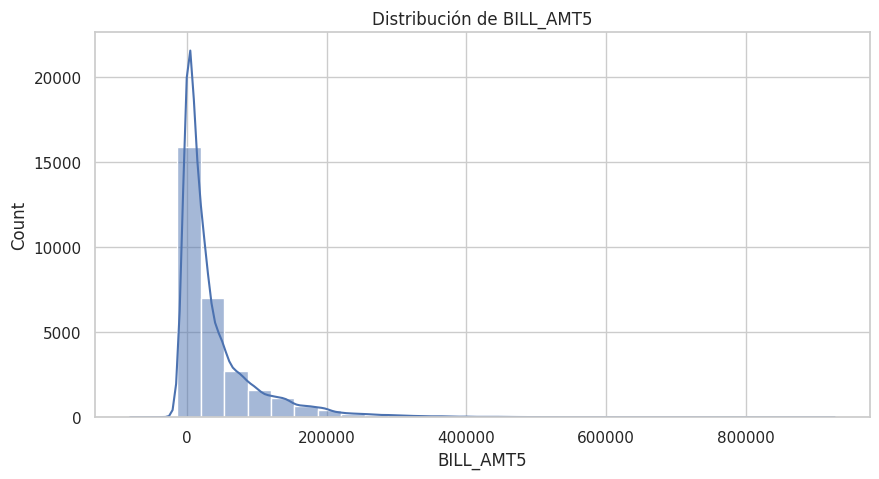

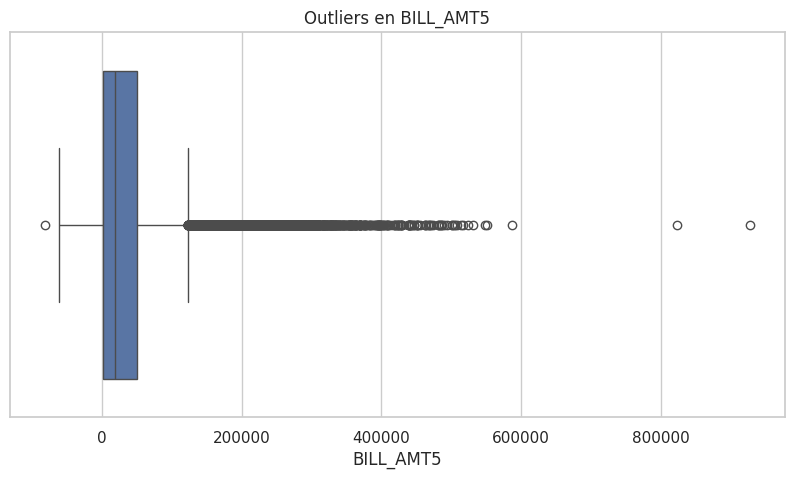

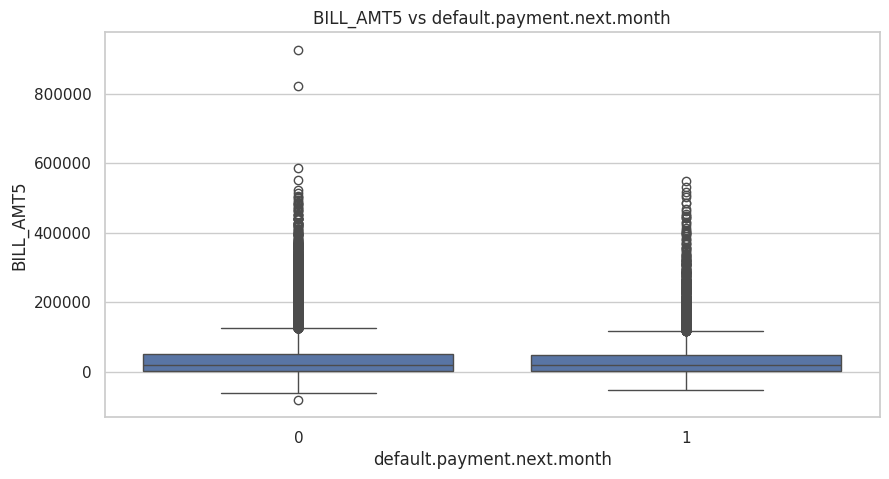


📊 Variable numérica: BILL_AMT6


,BILL_AMT6
count,30000.000000
mean,38871.760400
std,59554.107537
min,-339603.000000
25%,1256.000000
50%,17071.000000
75%,49198.250000
max,961664.000000


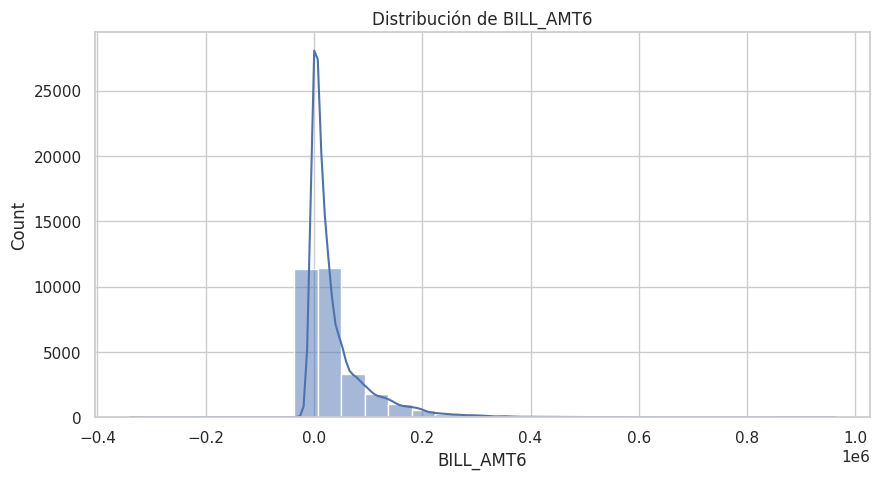

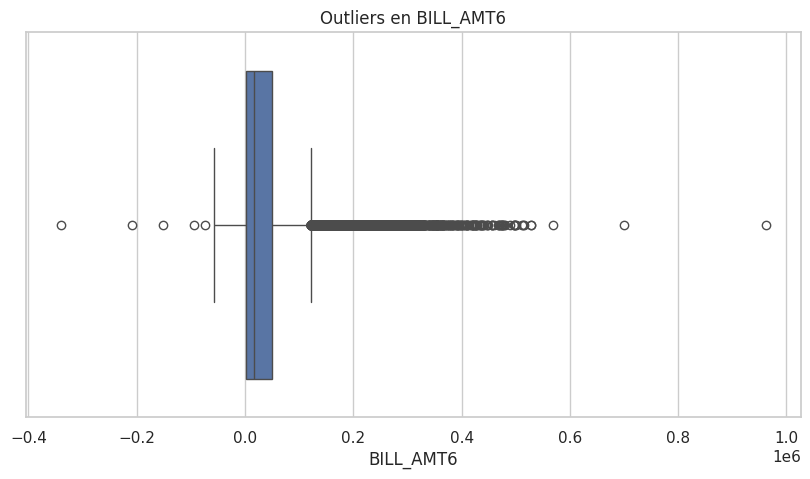

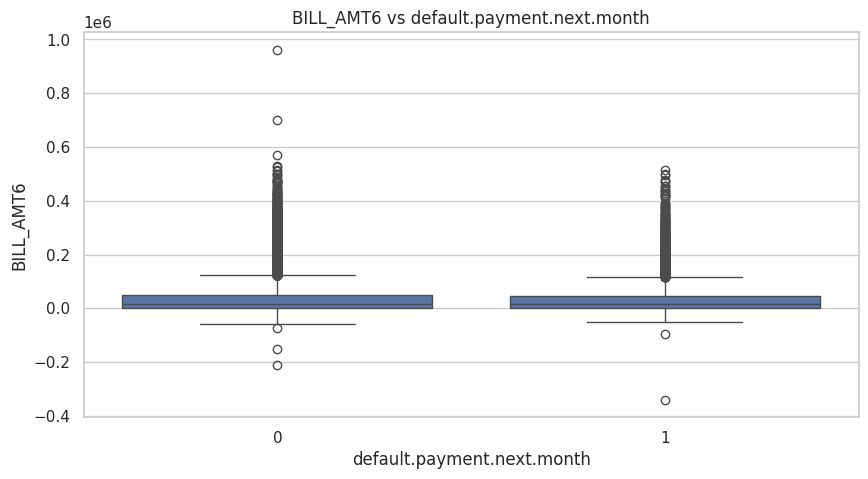


📊 Variable numérica: PAY_AMT1


,PAY_AMT1
count,30000.000000
mean,5663.580500
std,16563.280354
min,0.000000
25%,1000.000000
50%,2100.000000
75%,5006.000000
max,873552.000000


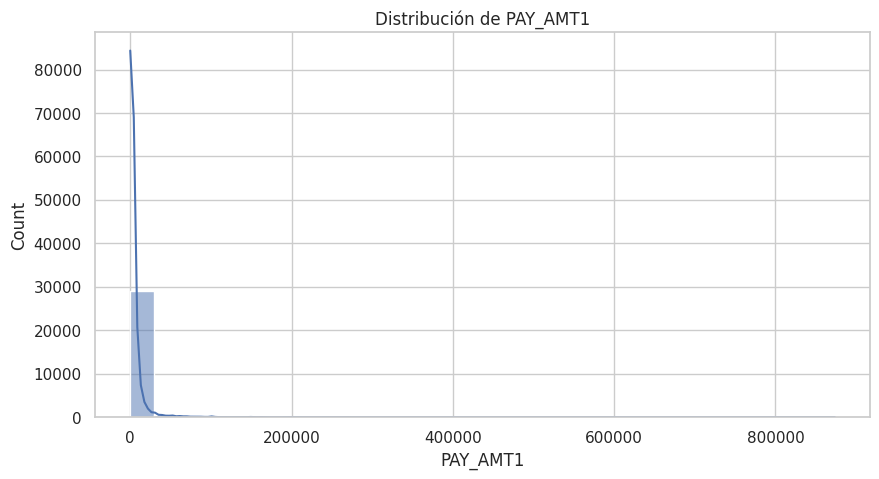

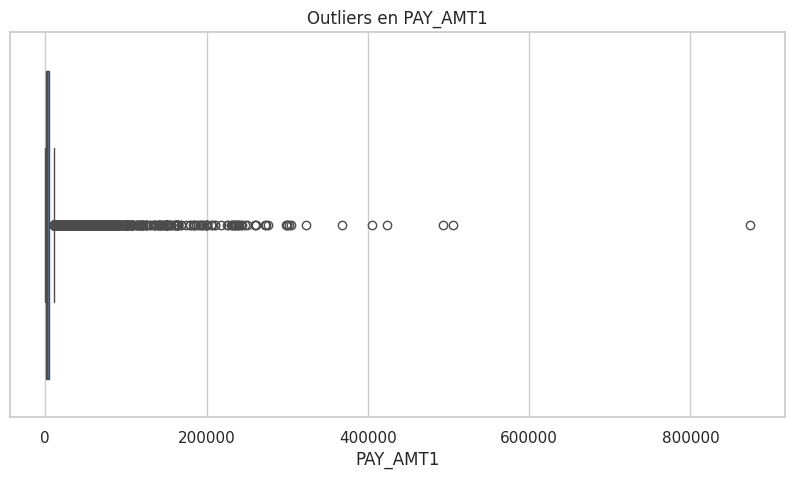

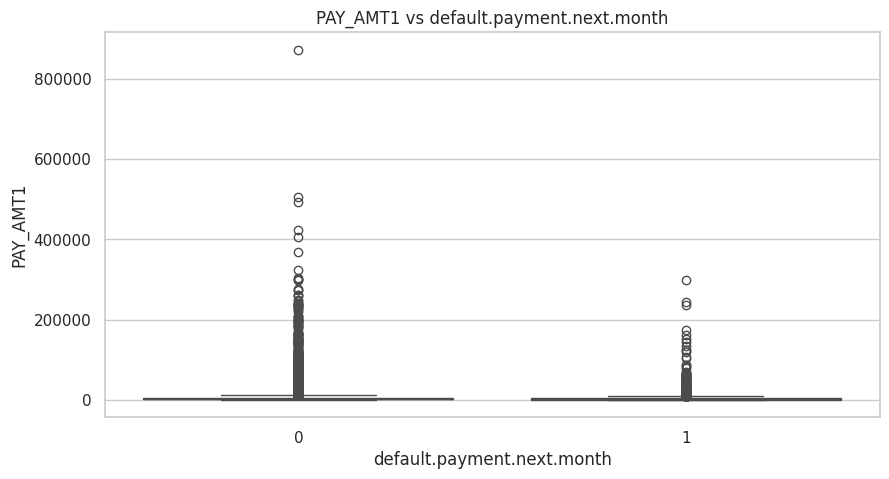


📊 Variable numérica: PAY_AMT2


,PAY_AMT2
count,3.000000e+04
mean,5.921163e+03
std,2.304087e+04
min,0.000000e+00
25%,8.330000e+02
50%,2.009000e+03
75%,5.000000e+03
max,1.684259e+06


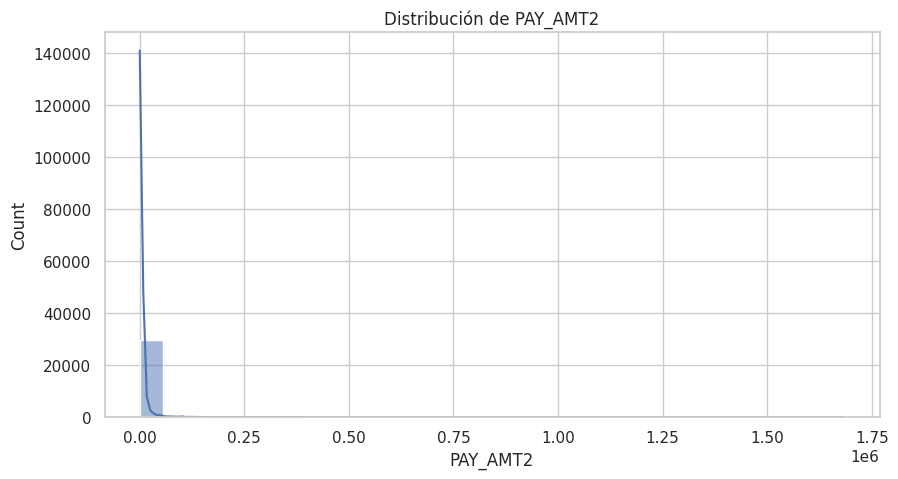

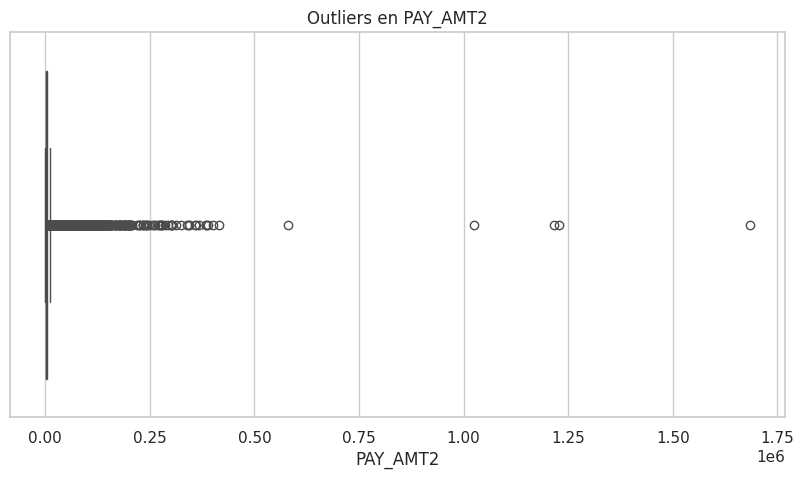

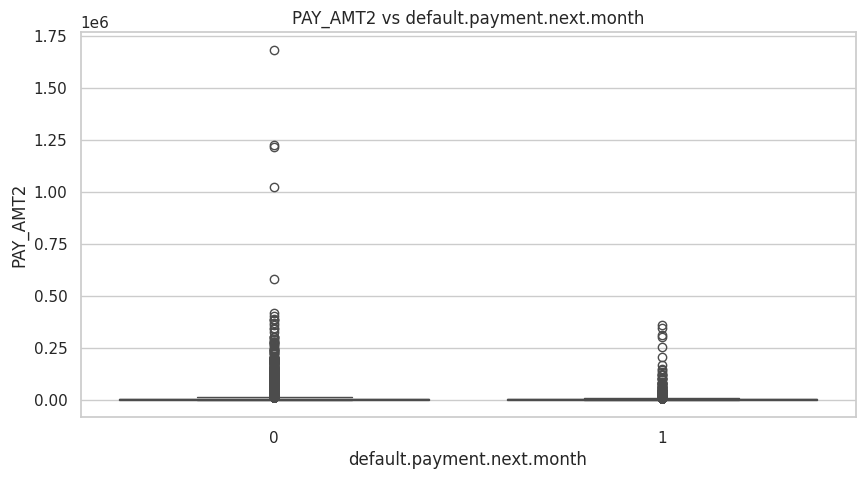


📊 Variable numérica: PAY_AMT3


,PAY_AMT3
count,30000.00000
mean,5225.68150
std,17606.96147
min,0.00000
25%,390.00000
50%,1800.00000
75%,4505.00000
max,896040.00000


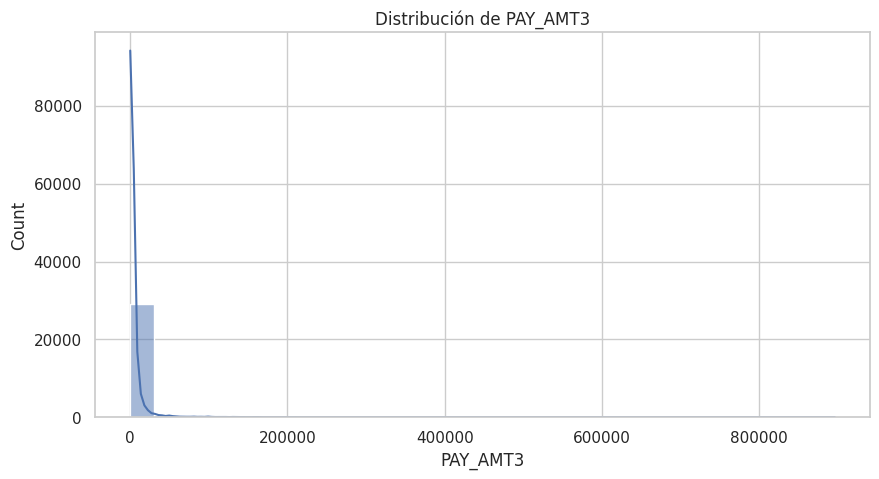

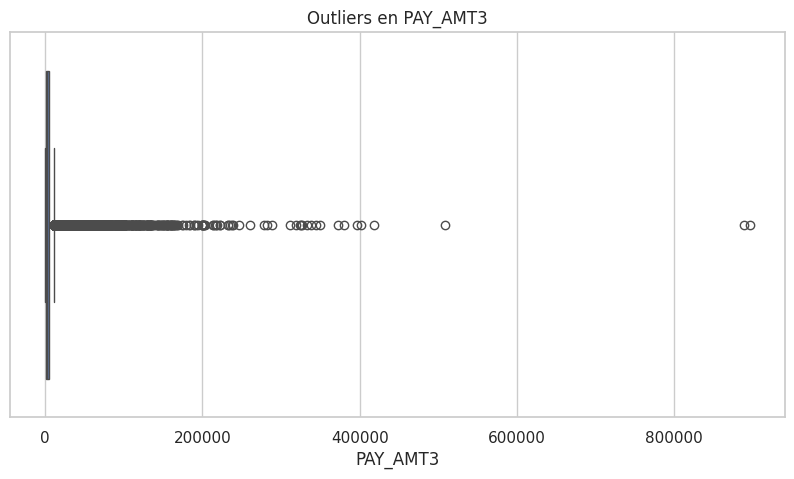

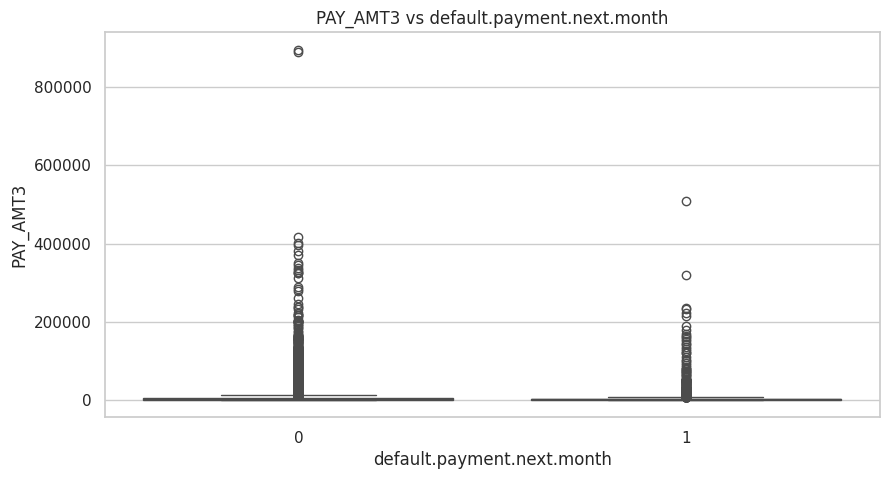


📊 Variable numérica: PAY_AMT4


,PAY_AMT4
count,30000.000000
mean,4826.076867
std,15666.159744
min,0.000000
25%,296.000000
50%,1500.000000
75%,4013.250000
max,621000.000000


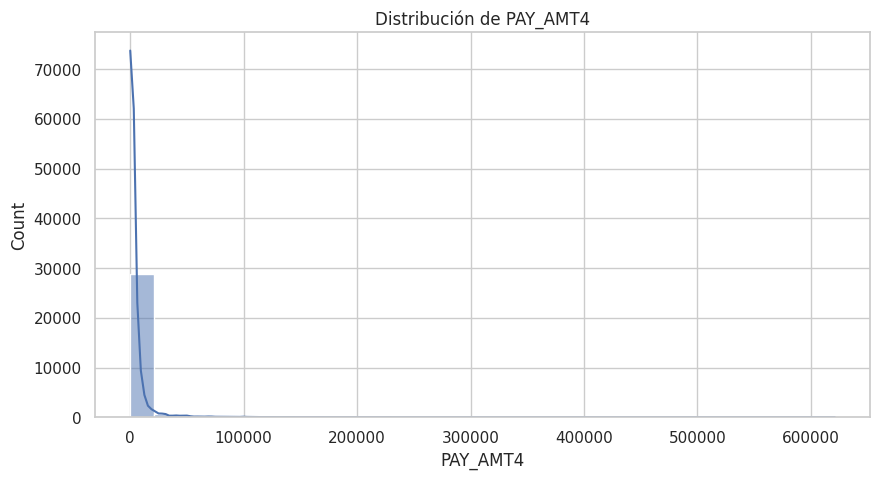

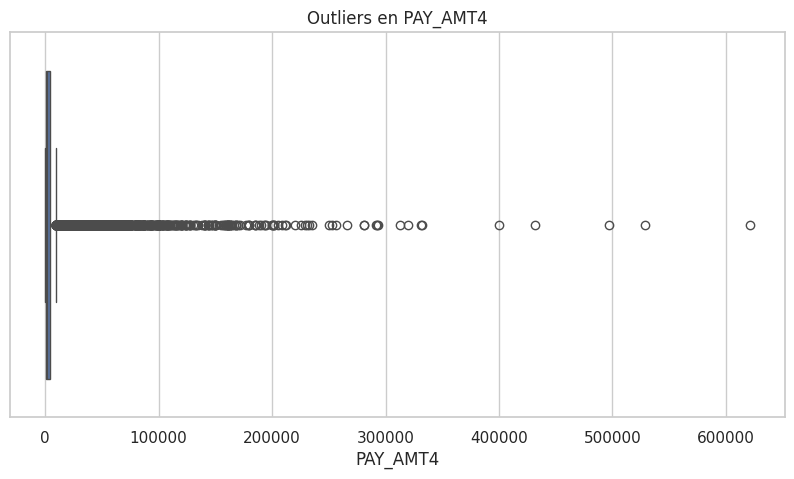

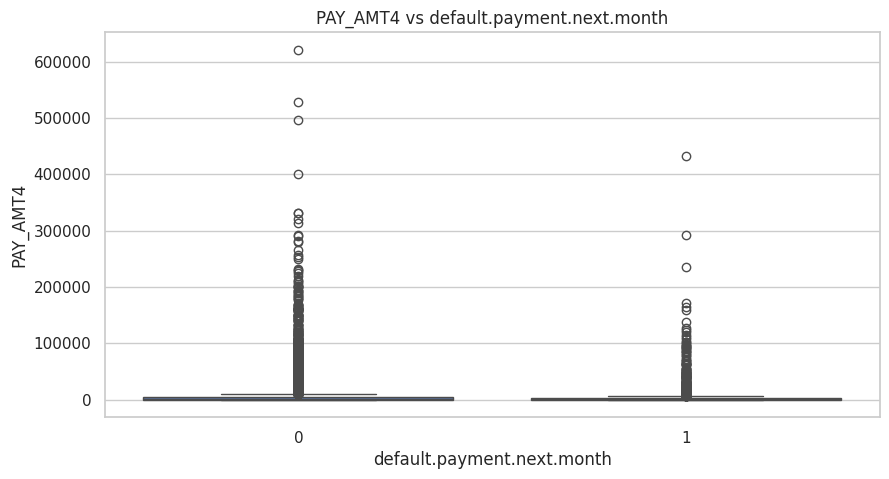


📊 Variable numérica: PAY_AMT5


,PAY_AMT5
count,30000.000000
mean,4799.387633
std,15278.305679
min,0.000000
25%,252.500000
50%,1500.000000
75%,4031.500000
max,426529.000000


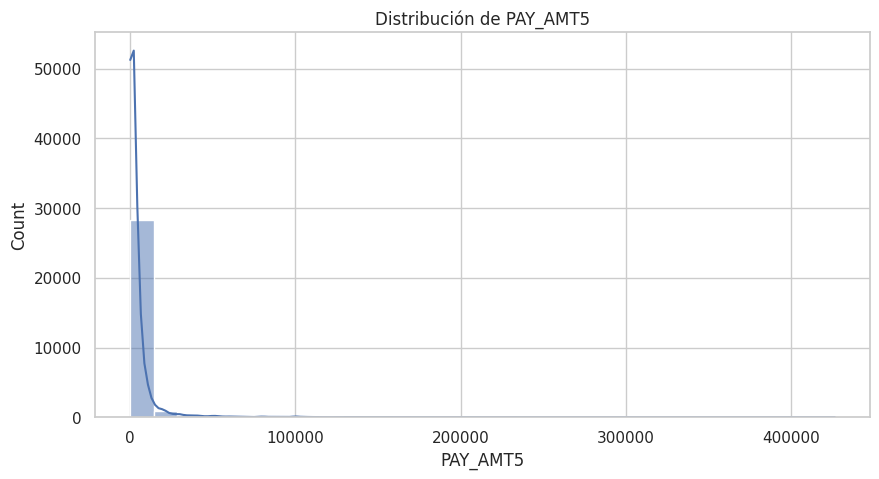

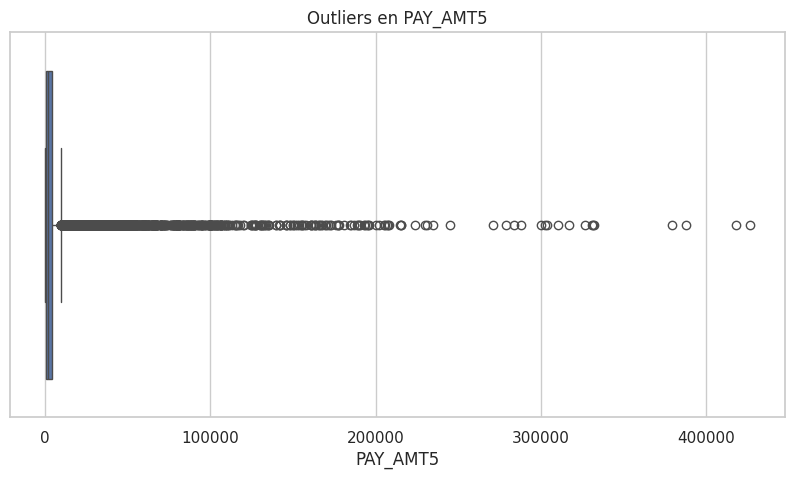

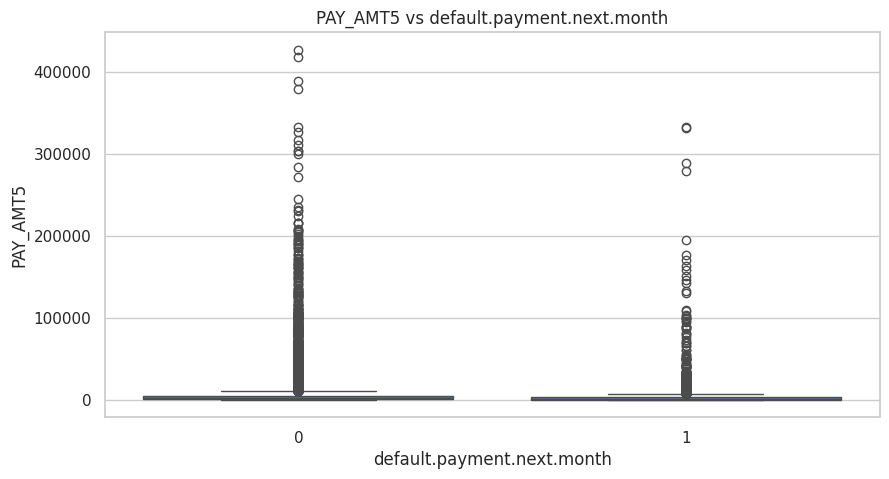


📊 Variable numérica: PAY_AMT6


,PAY_AMT6
count,30000.000000
mean,5215.502567
std,17777.465775
min,0.000000
25%,117.750000
50%,1500.000000
75%,4000.000000
max,528666.000000


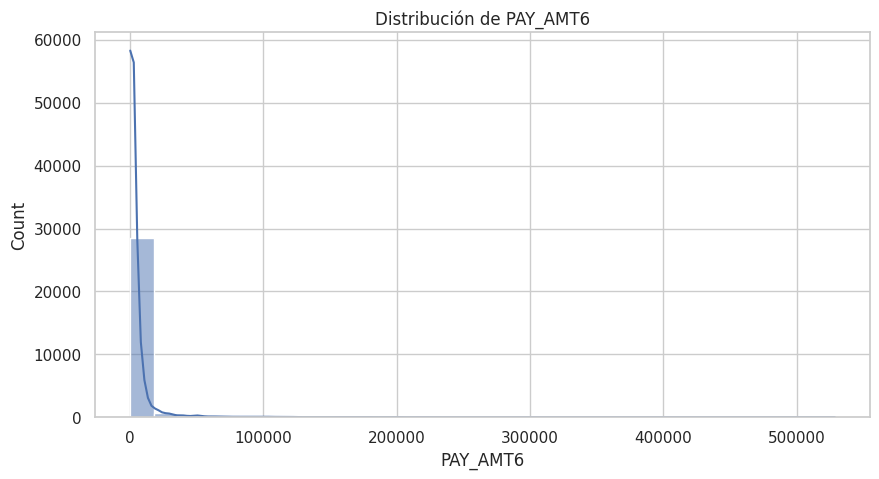

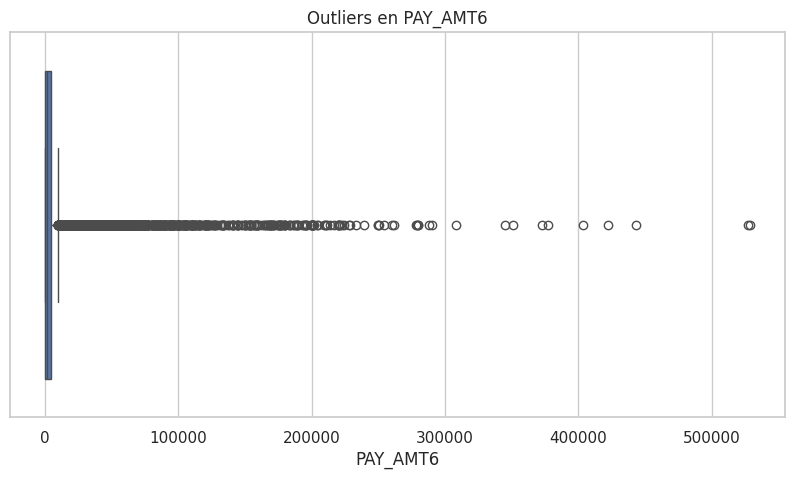

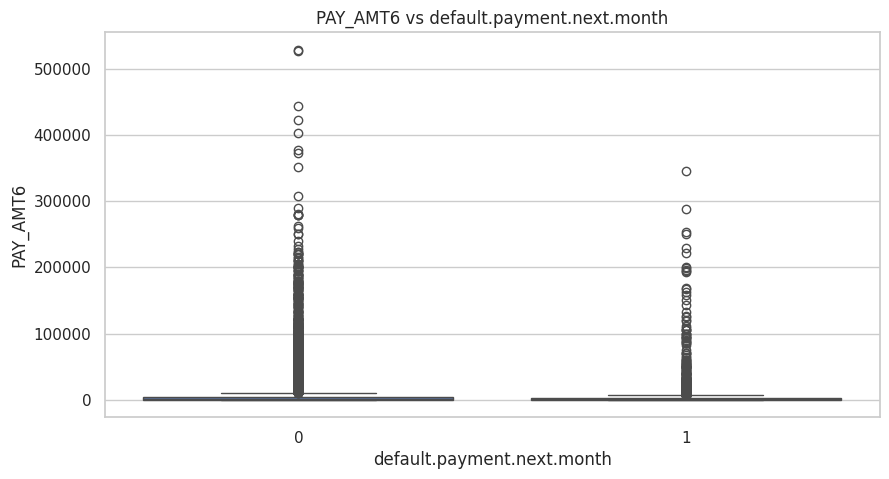


📊 Variable numérica: PAY_0


,PAY_0
count,30000.000000
mean,-0.016700
std,1.123802
min,-2.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,8.000000


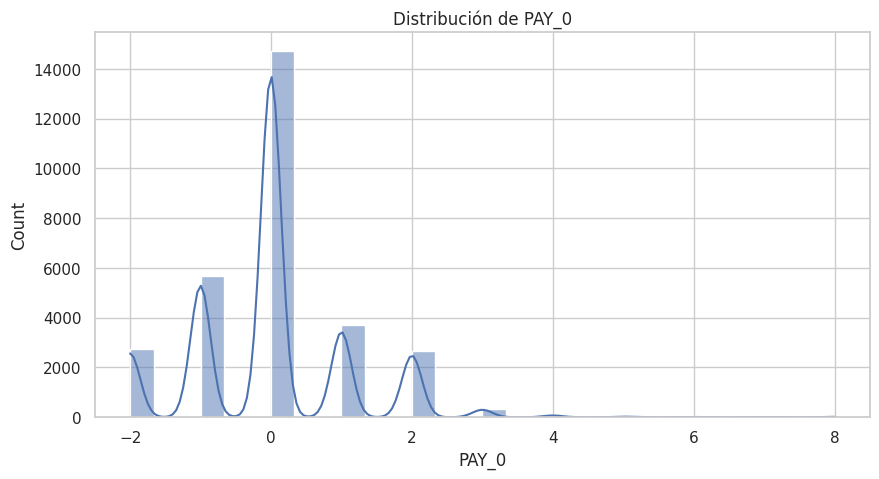

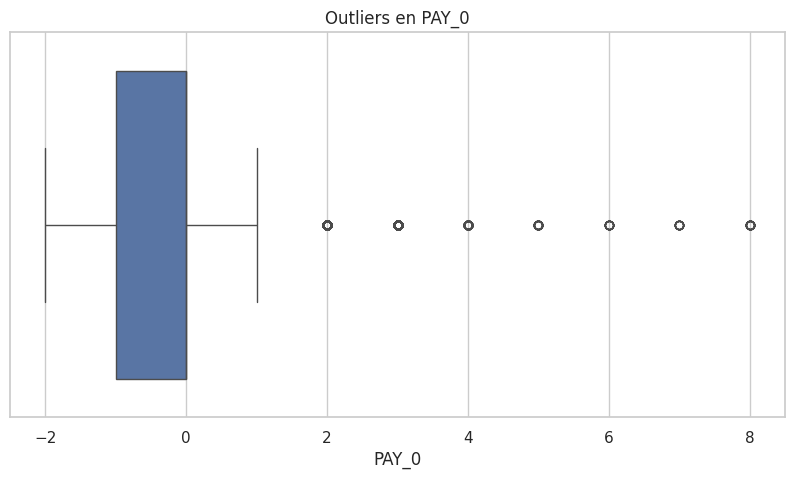

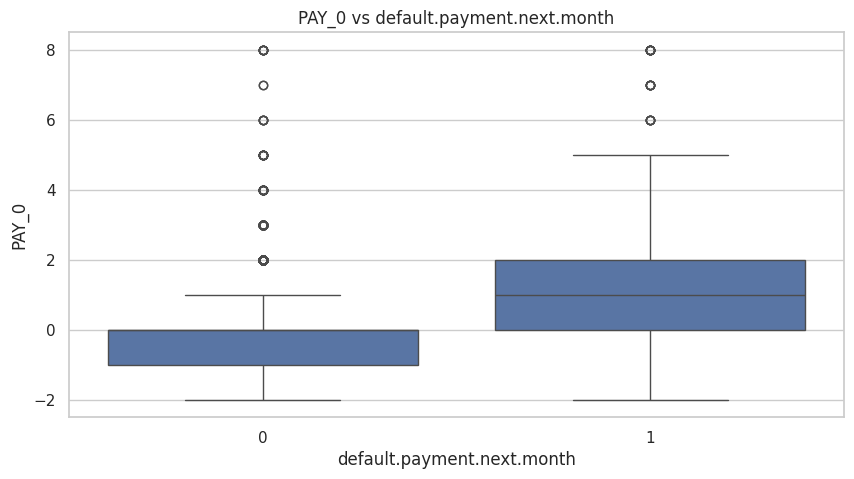


📊 Variable numérica: PAY_2


,PAY_2
count,30000.000000
mean,-0.133767
std,1.197186
min,-2.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,8.000000


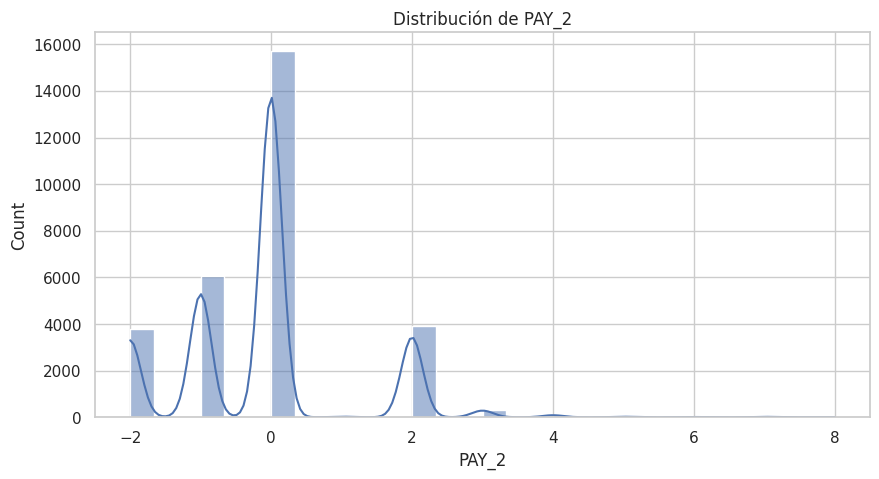

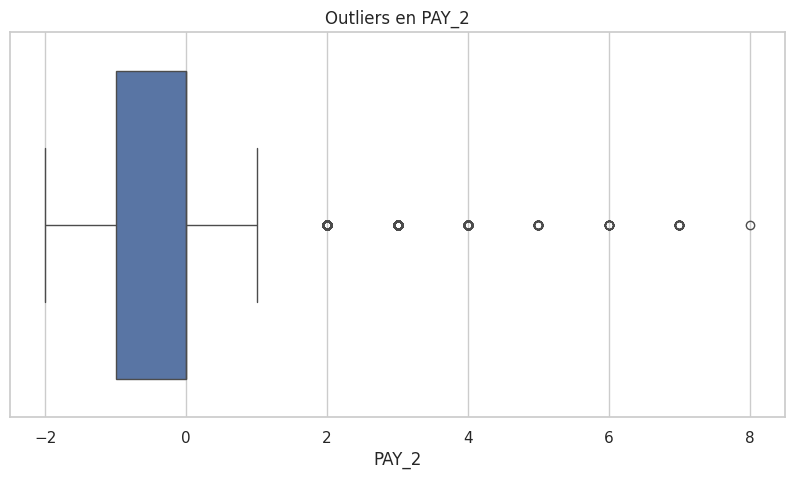

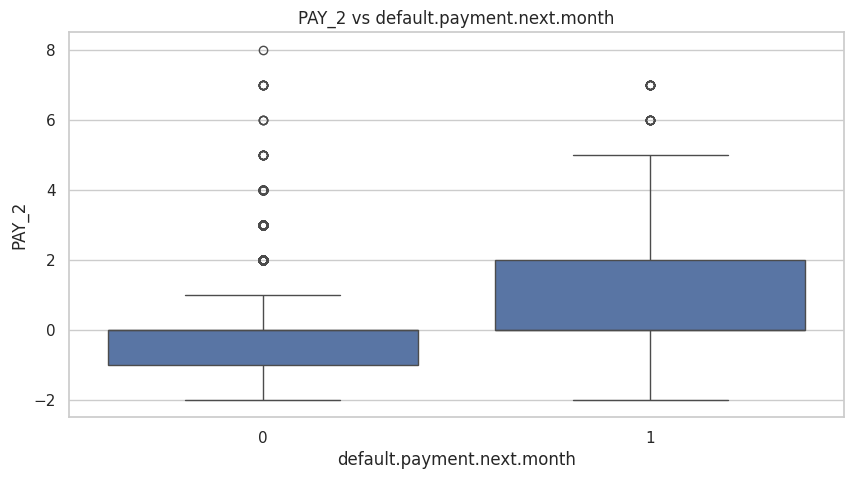


📊 Variable numérica: PAY_3


,PAY_3
count,30000.000000
mean,-0.166200
std,1.196868
min,-2.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,8.000000


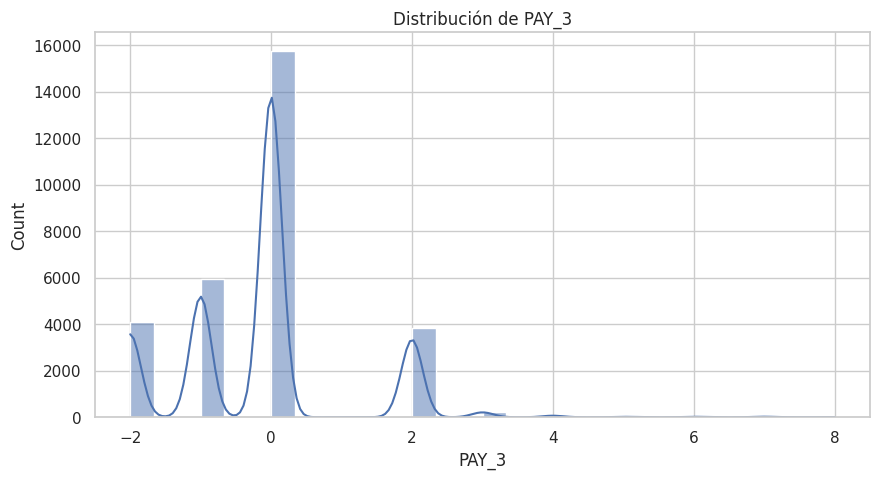

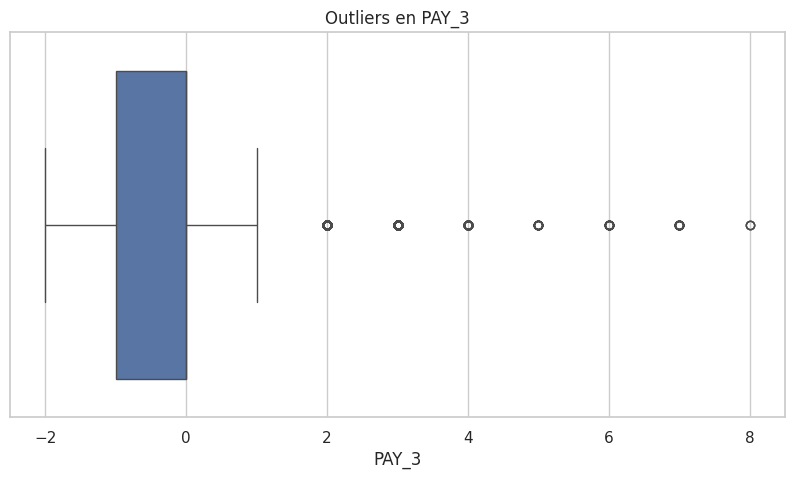

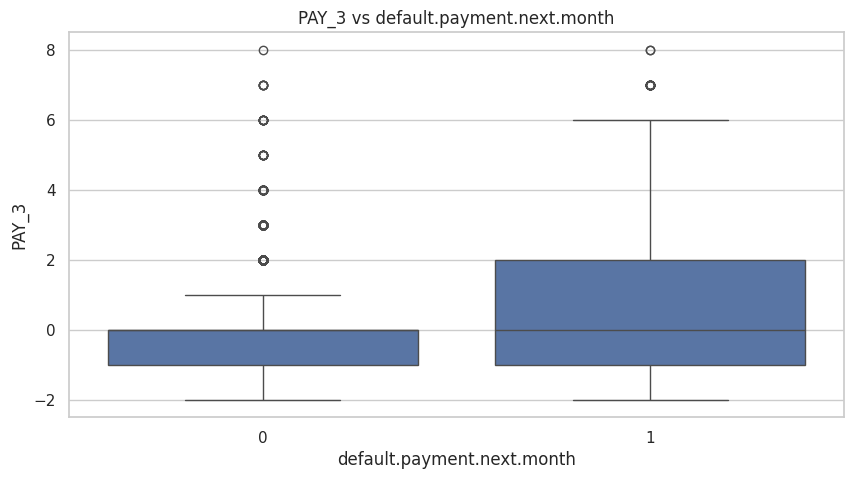


📊 Variable numérica: PAY_4


,PAY_4
count,30000.000000
mean,-0.220667
std,1.169139
min,-2.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,8.000000


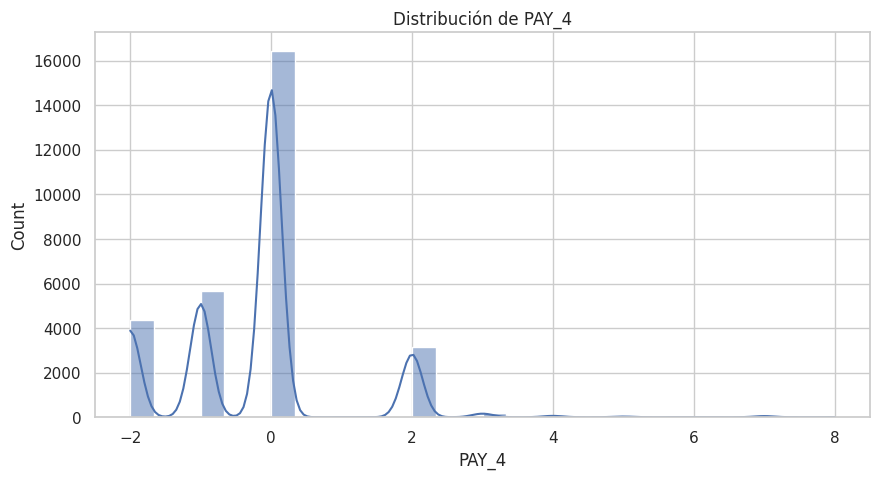

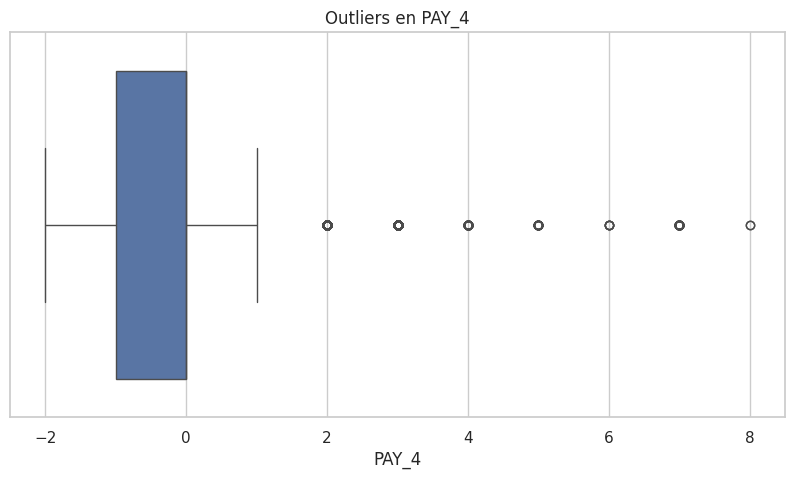

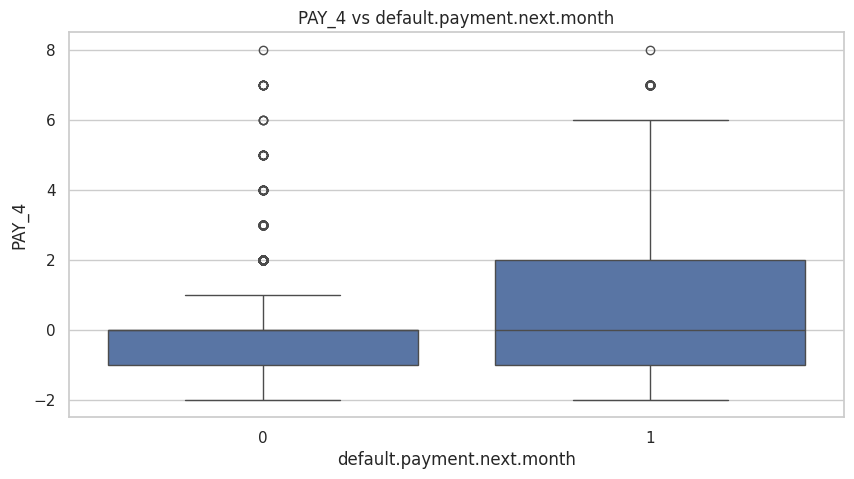


📊 Variable numérica: PAY_5


,PAY_5
count,30000.000000
mean,-0.266200
std,1.133187
min,-2.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,8.000000


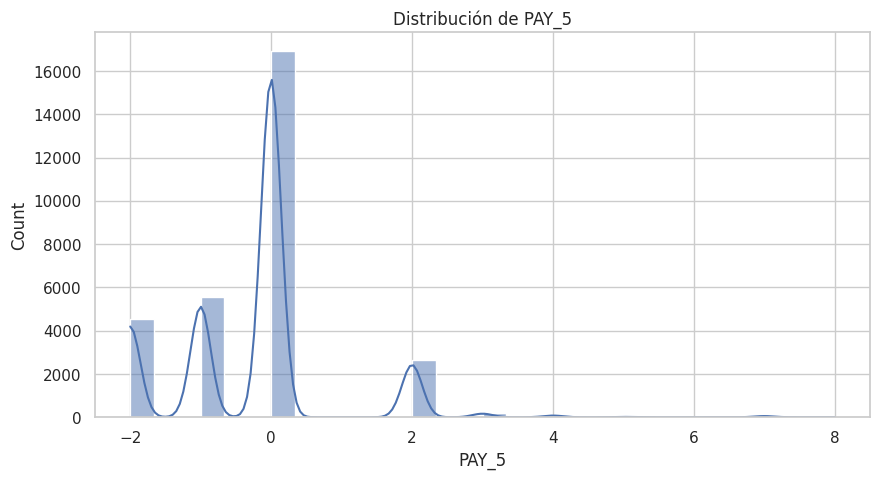

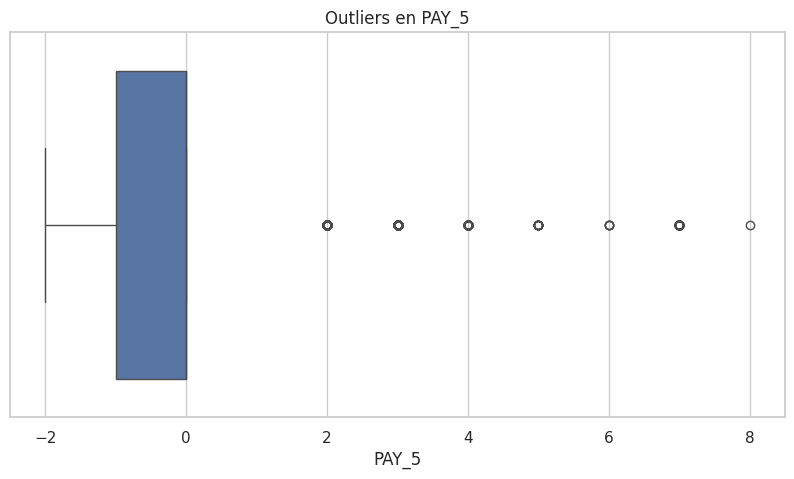

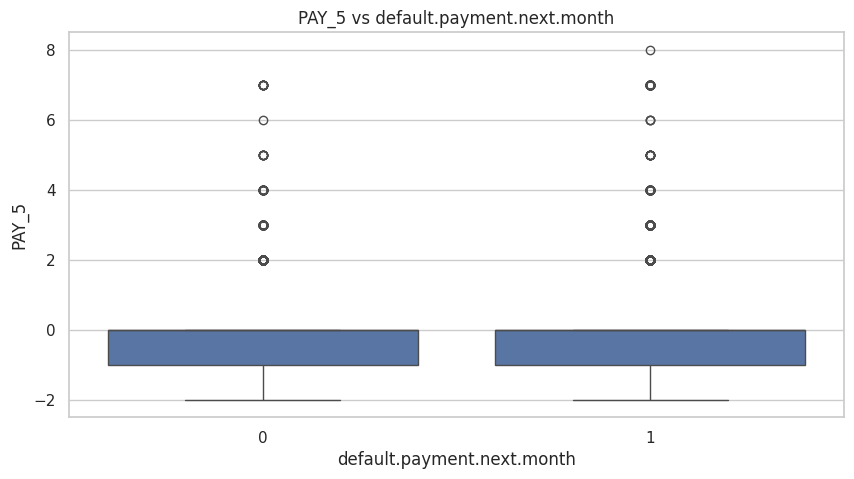


📊 Variable numérica: PAY_6


,PAY_6
count,30000.000000
mean,-0.291100
std,1.149988
min,-2.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,8.000000


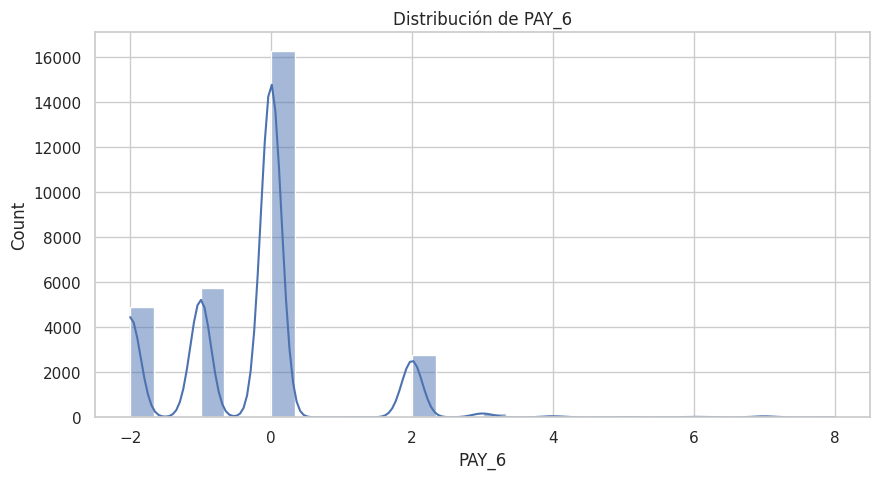

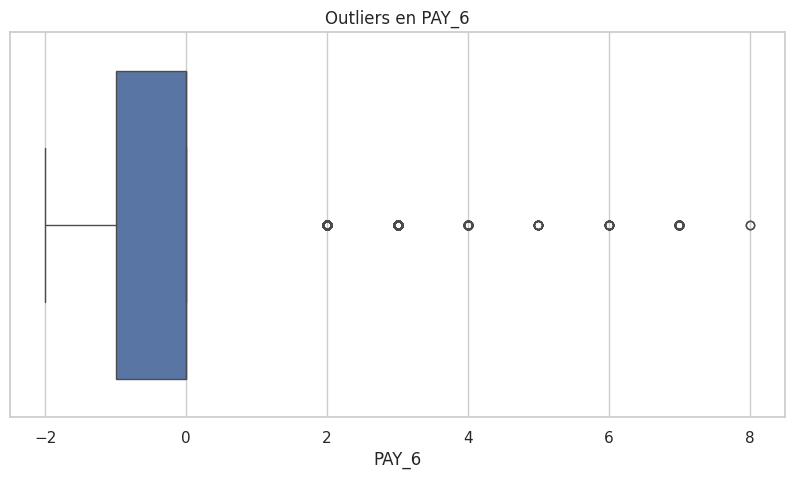

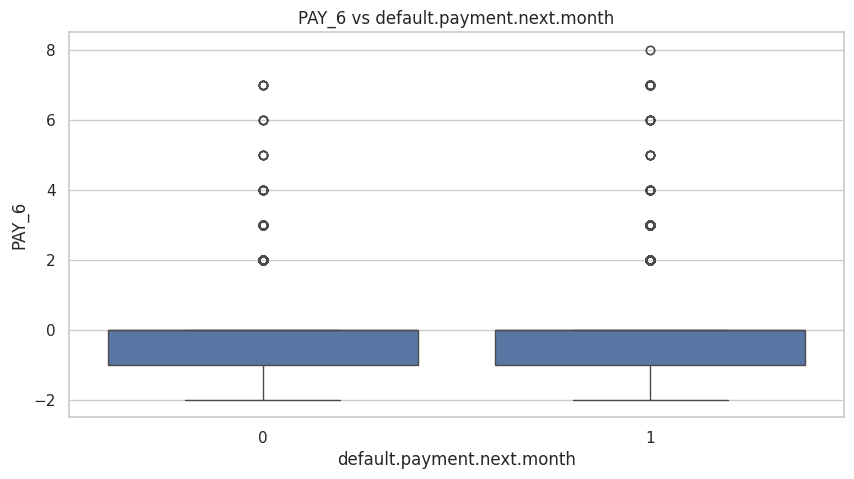

In [26]:
# ---------- Aplicar funciones a todas las variables ----------
print("📈 Análisis de variables individuales")

for var in numericas + ordinales:
    analizar_numerica(df, var)

**Categórica**


🧩 Variable categórica: SEX


,proportion
SEX,
2,60.4
1,39.6


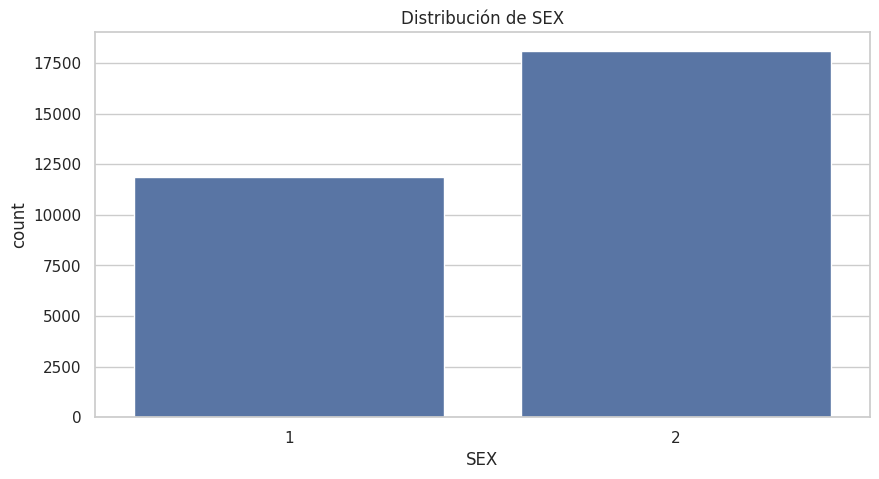

/tmp/ipython-input-25-3392817890.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y=target, data=df, ci=None)


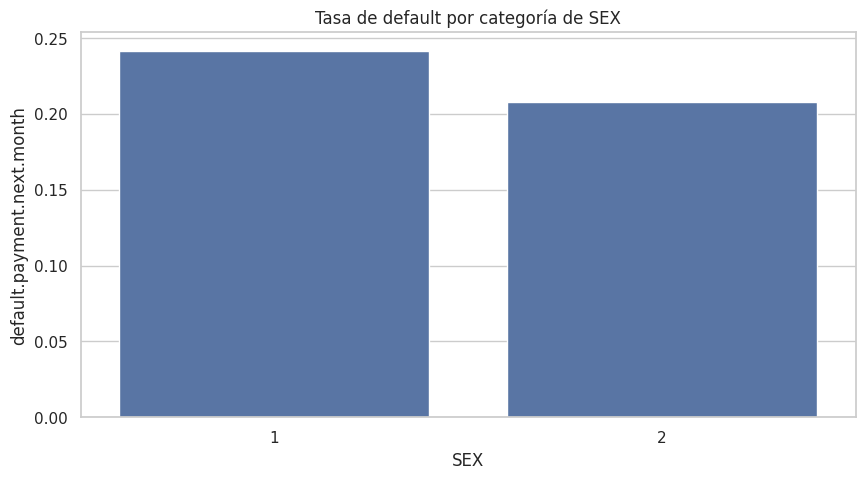


🧩 Variable categórica: EDUCATION


,proportion
EDUCATION,
2,46.8
1,35.3
3,16.4
5,0.9
4,0.4
6,0.2
0,0.0


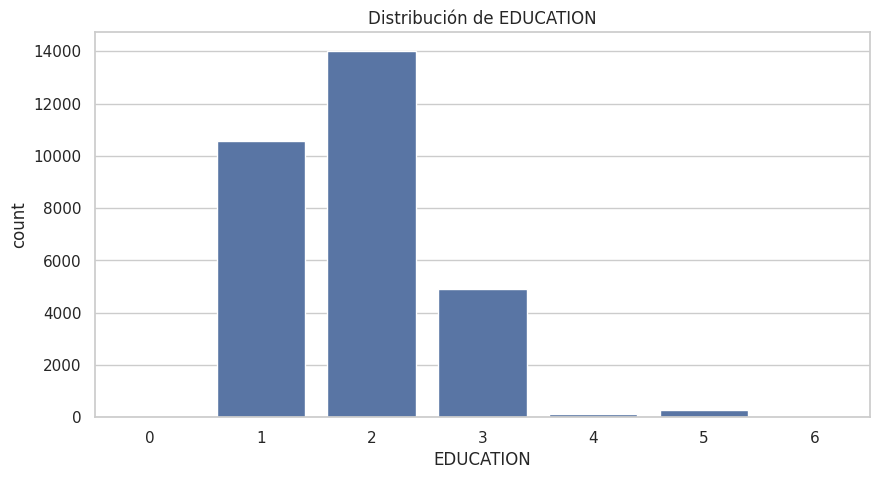

/tmp/ipython-input-25-3392817890.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y=target, data=df, ci=None)


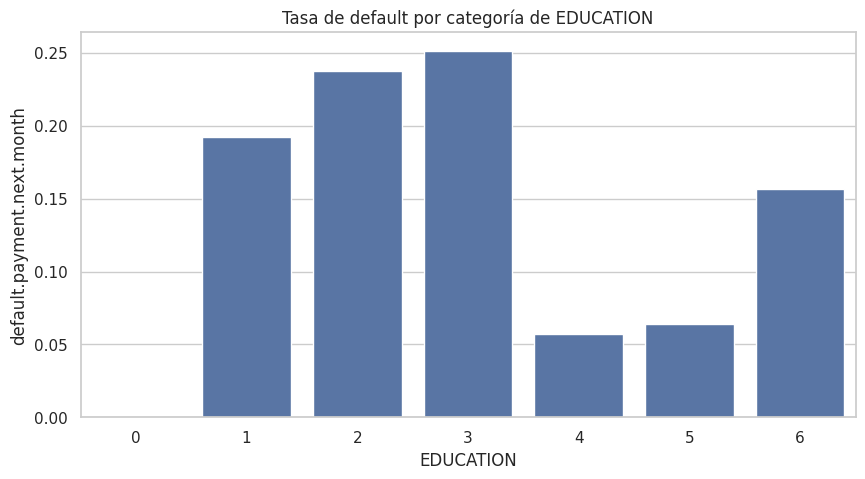


🧩 Variable categórica: MARRIAGE


,proportion
MARRIAGE,
2,53.2
1,45.5
3,1.1
0,0.2


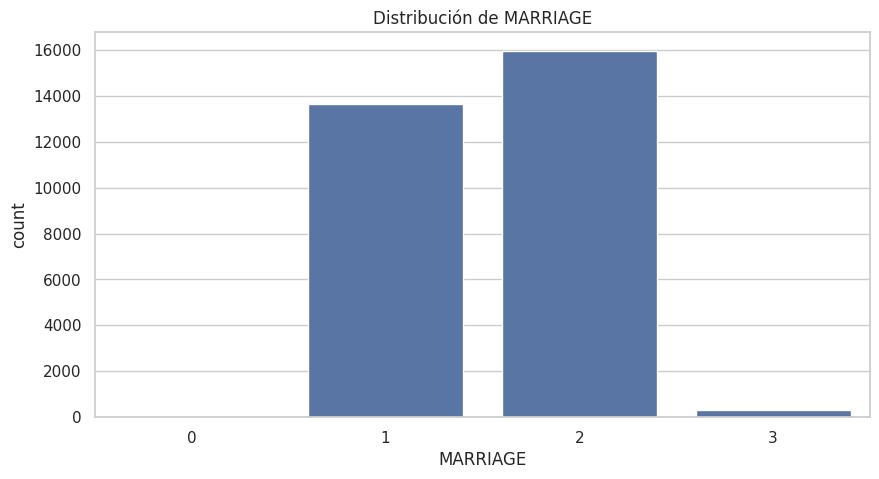

/tmp/ipython-input-25-3392817890.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y=target, data=df, ci=None)


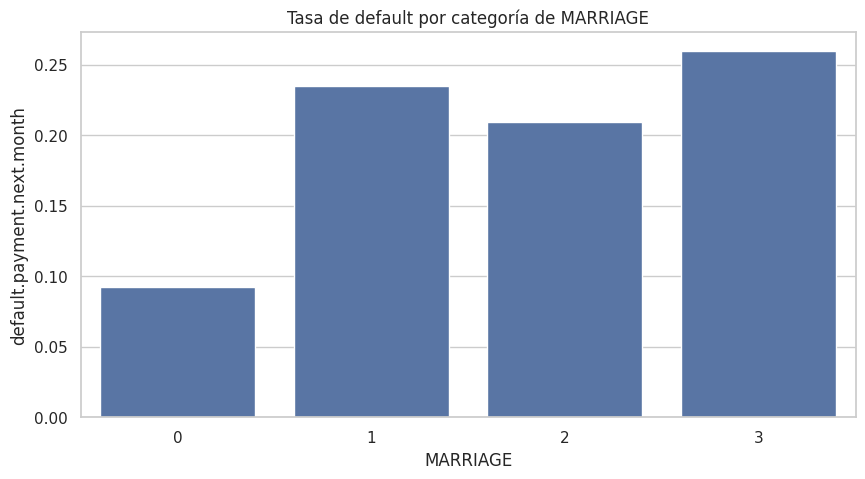

In [27]:
for var in categoricas:
    analizar_categorica(df, var)

## Ranking de variables

En esta sección se presenta un ranking de las variables más importantes para predecir la variable objetivo. Se utilizan técnicas como la correlación, el análisis de componentes principales (PCA) o la importancia de las variables en un modelo de aprendizaje automático.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


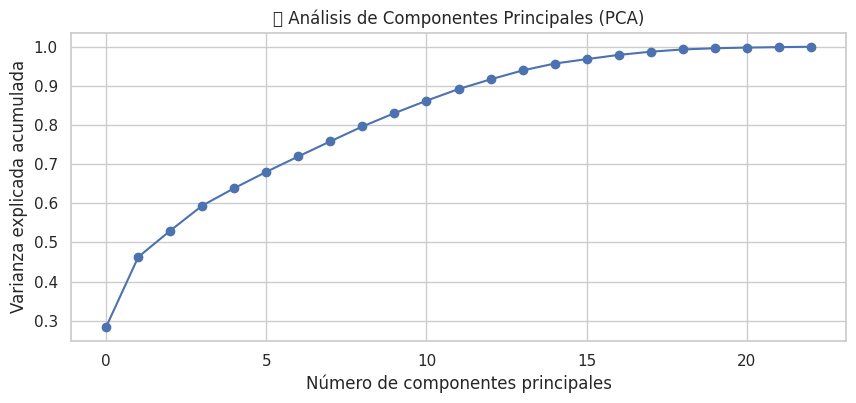

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Elimina columnas no predictoras
X = df.drop(columns=["ID", "default.payment.next.month"])

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Graficar varianza explicada acumulada
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("🔍 Análisis de Componentes Principales (PCA)")
plt.grid(True)
plt.show()


**Se requieren alrededor de 12 componentes de PCA para explicar el 90% de la varianza**

Esto singifica que ¡:
- Alta dimensionalidad útil: Muchas variables aportan información relevante, por lo que eliminar variables sin análisis previo podría afectar el desempeño del modelo.

- No hay una fuerte redundancia: Si fueran muy redundantes, con 2 o 3 componentes podrías explicar casi toda la varianza.

In [18]:
# Crear un DataFrame con los pesos (cargas) de cada variable en los componentes
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X.columns
)

# Ver las variables más influyentes en el primer componente
top_PC1 = loadings["PC1"].abs().sort_values(ascending=False).head(10)
print("🔝 Variables más influyentes en el primer componente:")
print(top_PC1)


🔝 Variables más influyentes en el primer componente:
BILL_AMT4    0.353883
BILL_AMT5    0.351752
BILL_AMT3    0.349777
BILL_AMT2    0.345797
BILL_AMT6    0.344514
BILL_AMT1    0.334385
PAY_5        0.210960
PAY_4        0.207038
PAY_6        0.206412
PAY_3        0.200213
Name: PC1, dtype: float64


## Relación entre variables explicativas y variable objetivo

En esta sección se presenta un análisis de la relación entre las variables explicativas y la variable objetivo. Se utilizan gráficos como la matriz de correlación y el diagrama de dispersión para entender mejor la relación entre las variables. Además, se pueden utilizar técnicas como la regresión lineal para modelar la relación entre las variables.

**Correlación**

/tmp/ipython-input-19-1233923278.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values[:10], y=target_corr.index[:10], palette="coolwarm")


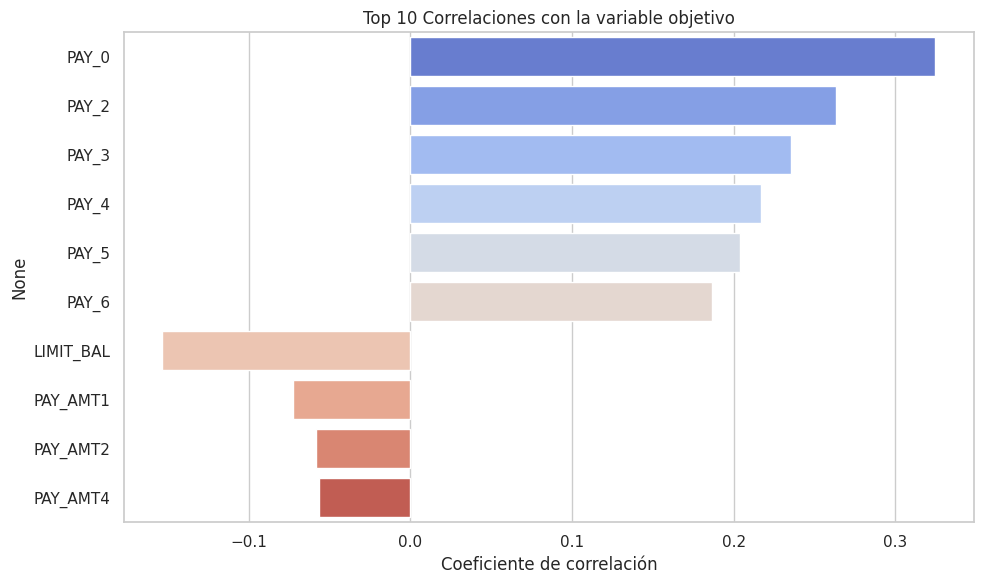

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlaciones con la variable objetivo
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix["default.payment.next.month"].drop("default.payment.next.month").sort_values(key=abs, ascending=False)

# Mostrar top 10 variables más correlacionadas
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values[:10], y=target_corr.index[:10], palette="coolwarm")
plt.title("Top 10 Correlaciones con la variable objetivo")
plt.xlabel("Coeficiente de correlación")
plt.tight_layout()
plt.show()


**Rgresión múltiple**

In [24]:
import statsmodels.api as sm

# 1. Definir X (variables explicativas) y y (variable objetivo)
X = df.drop(columns=["ID", "default.payment.next.month"])
y = df["default.payment.next.month"]

# 2. Agregar constante (intercepto)
X = sm.add_constant(X)

# 3. Ajustar modelo
model = sm.OLS(y, X).fit()

# 4. Mostrar resumen
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     default.payment.next.month   R-squared:                       0.124
Model:                                    OLS   Adj. R-squared:                  0.123
Method:                         Least Squares   F-statistic:                     184.5
Date:                        Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                                18:43:44   Log-Likelihood:                -14202.
No. Observations:                       30000   AIC:                         2.845e+04
Df Residuals:                           29976   BIC:                         2.865e+04
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

Las variables significativas en el modelo (que tienen un p valor < 0.05) son:

LIMIT_BAL  
SEX  
EDUCATION  
MARRIAGE  
AGE  
PAY_0  
PAY_2  
PAY_3  
BILL_AMT1  
PAY_AMT1  
